##Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

In [5]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [6]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


#### Описание данных:
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
*Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [7]:
print (data.info())
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

При предварительном просмотре выявлено, что данные неполные. Очень много пропусков в графах с оценками критиков, игроков и рейтингом ESRB. Также есть небольшое количество пропусков в графах Жанр, Имя, Год выпуска

## Шаг 2. Подготовьте данные

Замените названия столбцов (приведите к нижнему регистру);

Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

Обработайте пропуски при необходимости:
* Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
* Опишите причины, которые могли привести к пропускам;
* Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
* Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

Переименуем столбцы

In [8]:
columns ={}
for col in data.columns:
    columns[col] = col.lower()
data = data.rename(columns=columns)
del columns
data.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


В столбце 'year_of_release' заполним пропуски выделяющимся значением - 1950 годом. Изменим тип столбца в столбце 'year_of_release' на int. Год не может быть дробным.

In [34]:
data['year_of_release'] = data['year_of_release'].fillna(1950).astype('int')
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54


Проверим значения столбца 'rating'

In [10]:
print (data['year_of_release'][pd.isnull(data['rating'])].unique())
#рейтинг ESRB  ввели в 1994 году, но пропуски есть строках и с более поздними годами выпуска. Заполним значением Unknown
data['rating'] = data['rating'].fillna('unknown')
print (data['rating'].unique())

[1985 1996 1989 1984 2005 1999 1990 2006 1988 2002 2010 1998 2015 2013
 2009 2014 1992 1993 2004 1994 1997 2012 2007 1982 2016 2003 2011 1986
 2000 2001 1995 2008 1991 1981 1987 1980 1983 1950]
['E' 'unknown' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


В столбце 'user_score' хоть и проставлены оценки, но имеются пропуски, а также значение TBD - To Be Determined - " Будет определено". Заменим такие значения и пропуски на -1. Столбец преобразуем в float.

Пропуски в 'name', 'genre' заполним unknown.

Пропуски в 'critic_score' заполним -1.

In [11]:
print (data['user_score'].unique())
data['user_score'] = data['user_score'].fillna(-1)
data.loc[data['user_score'] == 'tbd', 'user_score'] = -1
data['user_score'] = data['user_score'].astype('float')
data['critic_score'] = data['critic_score'].fillna(-1)
data['name'] = data['name'].fillna('unknown')
data['genre'] = data['genre'].fillna('unknown')
data.info()

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64


Создадим столбец с итоговым количеством продаж по всем регионам.

In [12]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52


## Шаг 3. Проведите исследовательский анализ данных
* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Не учитывайте в работе данные за предыдущие годы.
* Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
* Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
* Соотнесите выводы с продажами игр на других платформах.
* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Посмотрим, как выпускались игры по годам.

<Axes: title={'center': 'Количество выпускаемых игр по годам'}, xlabel='Годы выпуска'>

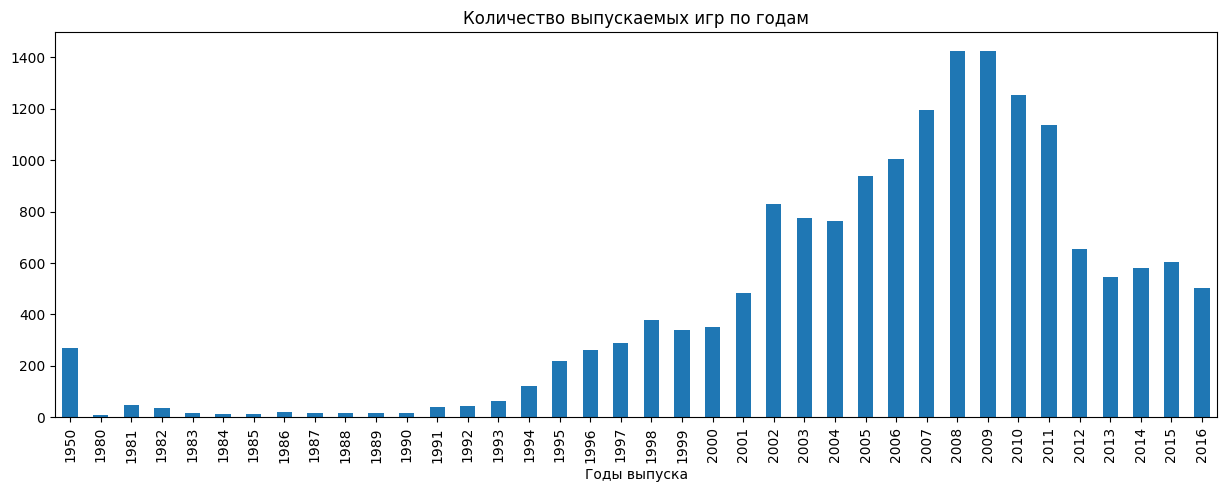

In [13]:
game_by_year = data.groupby('year_of_release')['name'].count()
game_by_year.plot(xlabel='Годы выпуска', title='Количество выпускаемых игр по годам', kind='bar', figsize=(15,5))

Рост игровой индустрии начался с 1990 года, до этого было некое плато. Будем рассматривать период начиная с 1990 года.

In [14]:
act_data = data[data['year_of_release'] >= 1990]

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Количество выпускаемых игр по годам для PS2


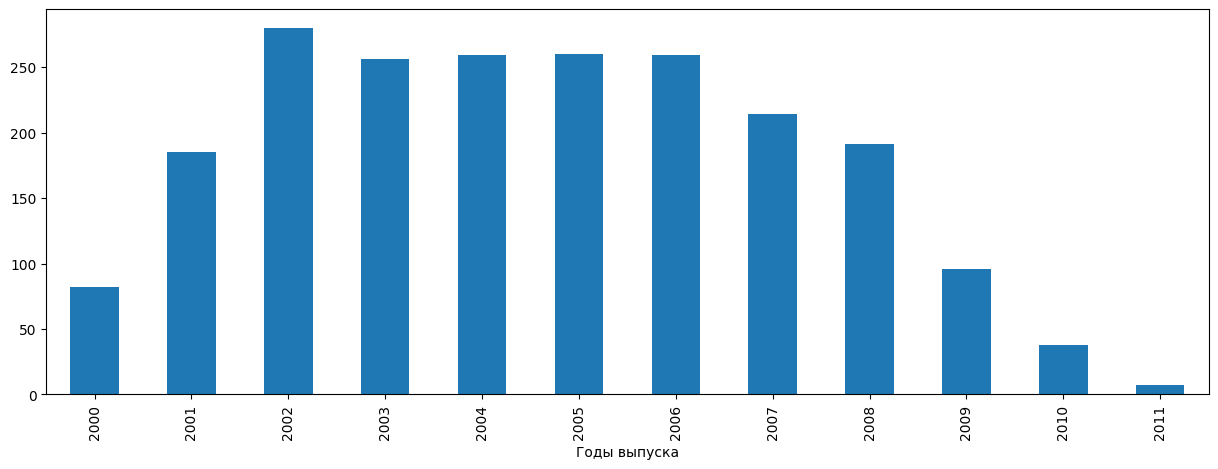

Количество выпускаемых игр по годам для X360


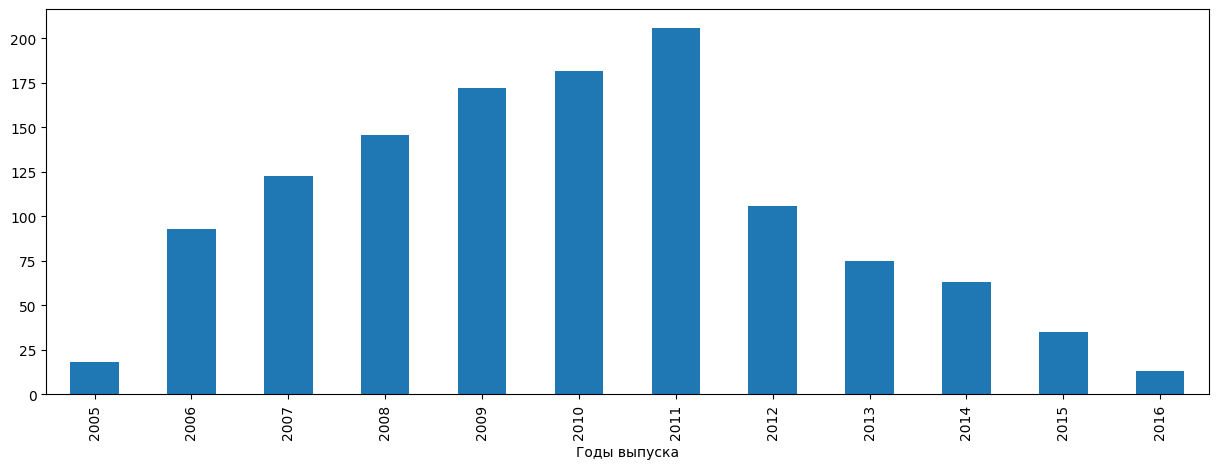

Количество выпускаемых игр по годам для PS3


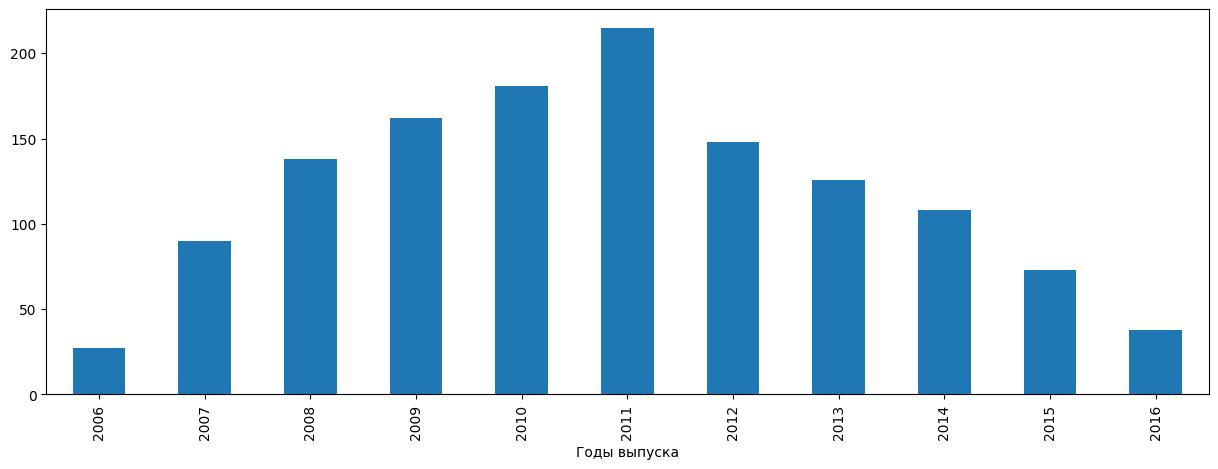

Количество выпускаемых игр по годам для Wii


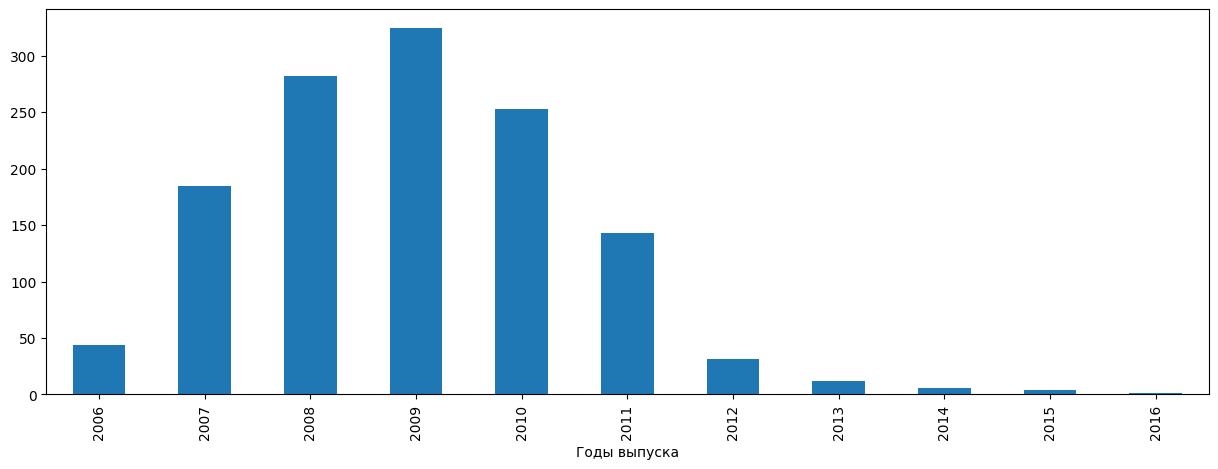

Количество выпускаемых игр по годам для DS


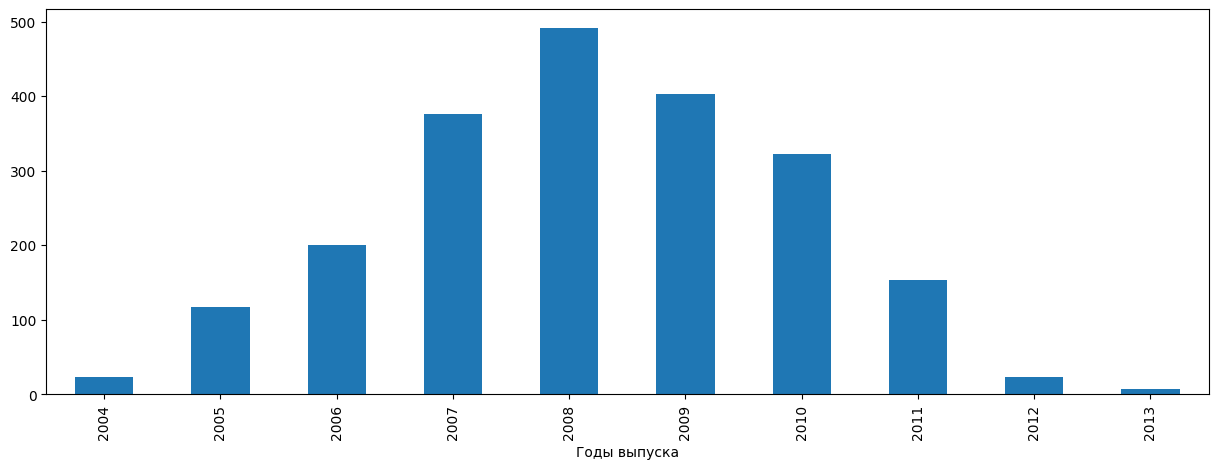

Количество выпускаемых игр по годам для PS


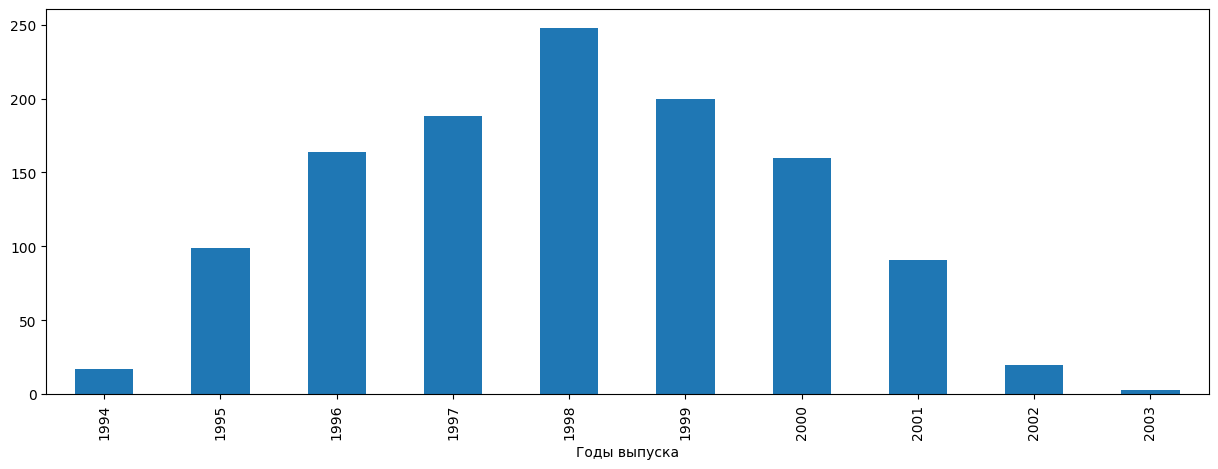

Количество выпускаемых игр по годам для PS4


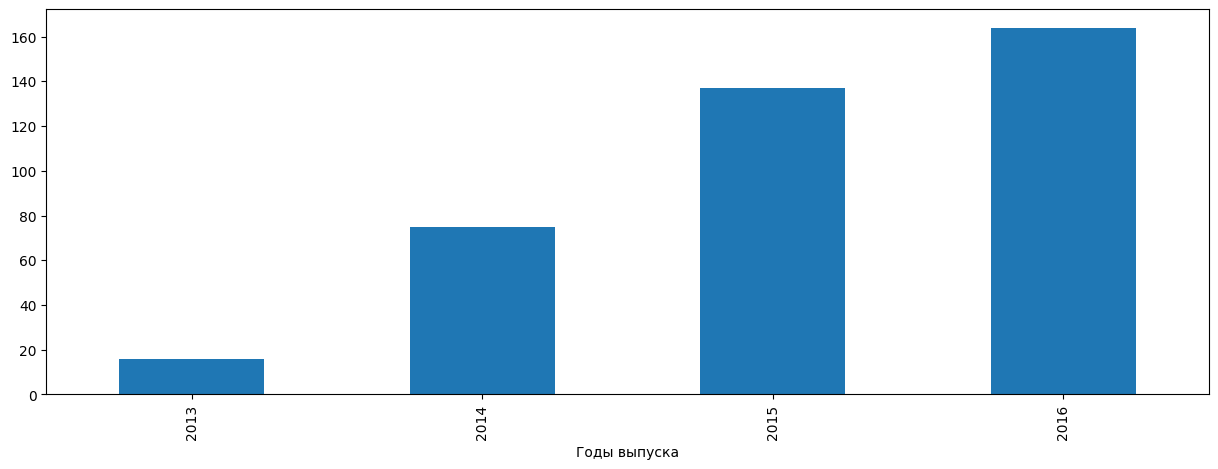

Количество выпускаемых игр по годам для GBA


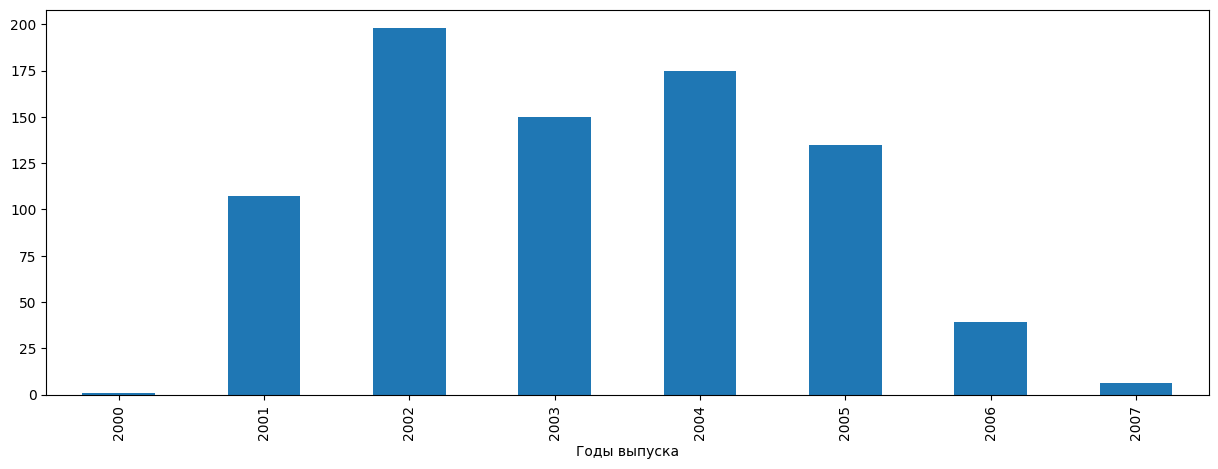

Количество выпускаемых игр по годам для PSP


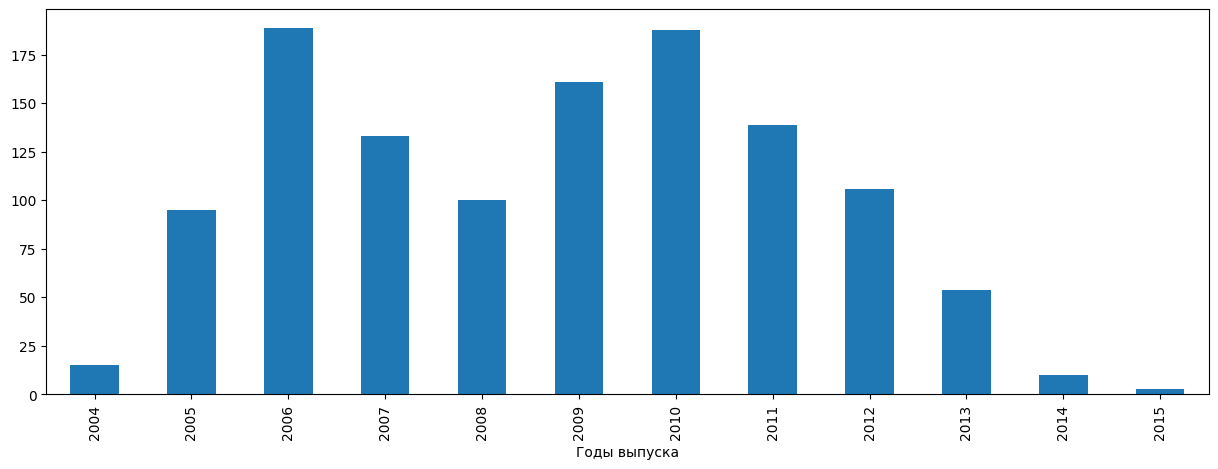

Количество выпускаемых игр по годам для 3DS


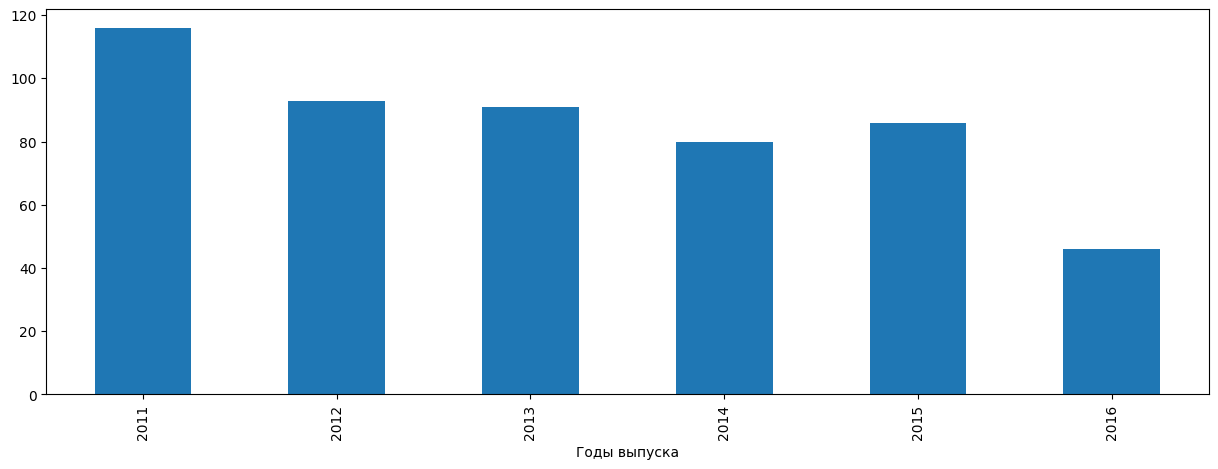

Количество выпускаемых игр по годам для PC


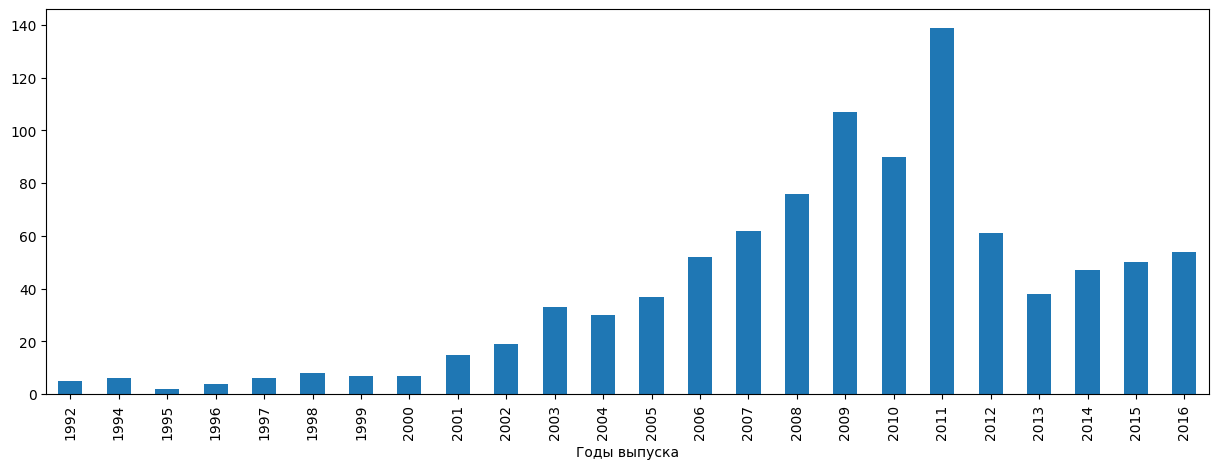

Количество выпускаемых игр по годам для XB


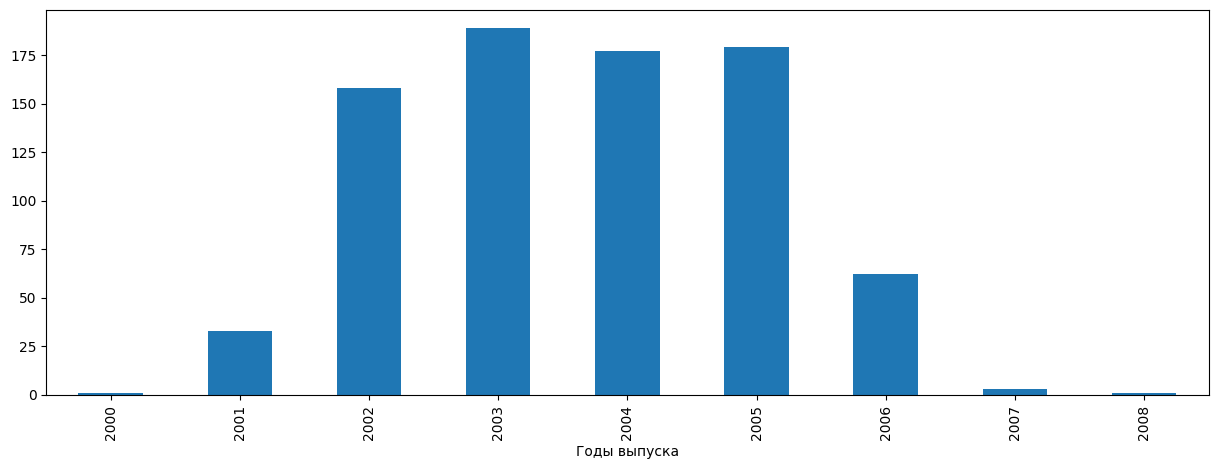

Количество выпускаемых игр по годам для N64


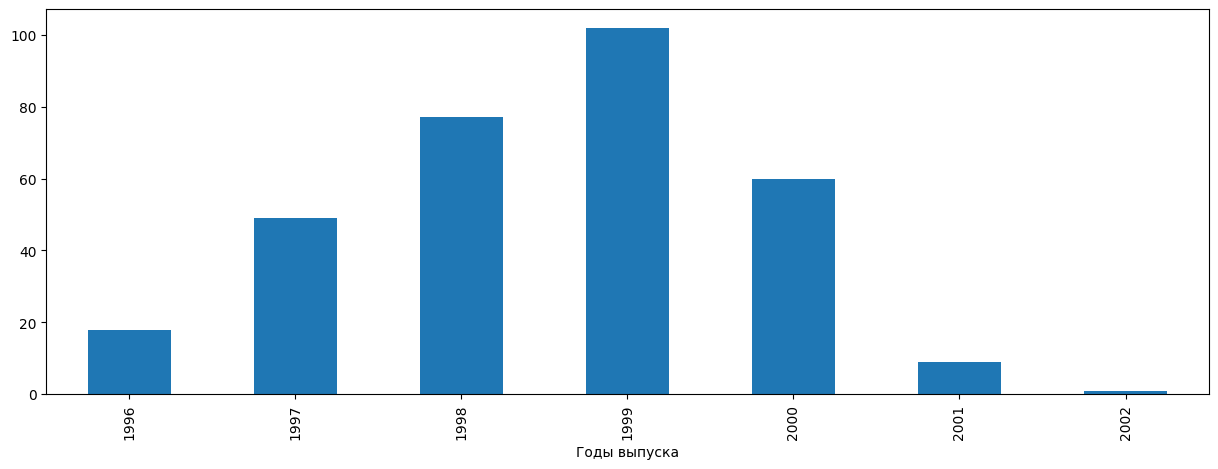

Количество выпускаемых игр по годам для SNES


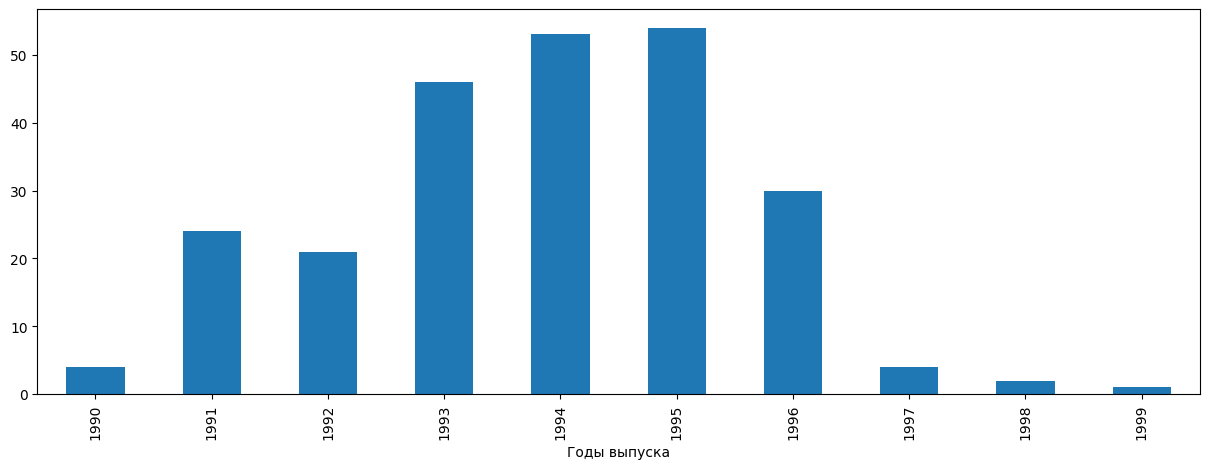

Количество выпускаемых игр по годам для GC


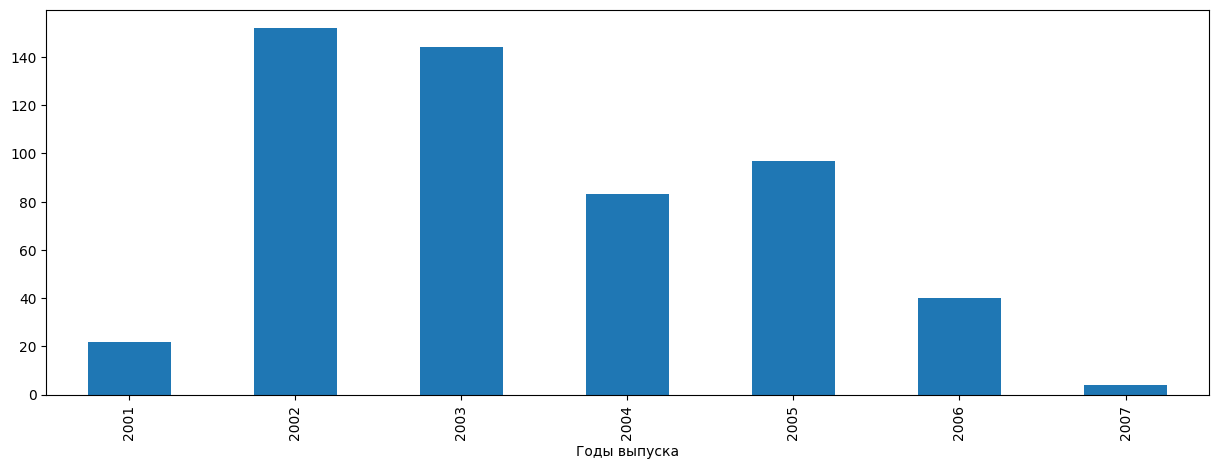

In [15]:
sales_by_platform = act_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index(level='platform')
sales_by_platform.columns = ['platform', 'total_sales']
best_15_platform = sales_by_platform.sort_values(by='total_sales', ascending=False)['platform'].head(15).tolist()
for platform in best_15_platform:
    games = act_data[act_data['platform'] == platform].groupby('year_of_release')['name'].count()
    print ('Количество выпускаемых игр по годам для', platform)
    games.plot(xlabel='Годы выпуска', kind='bar', figsize=(15,5))
    plt.show()


Как можно увидеть из представленной инфографики - средний срок "жизни" платформы - 6-7 лет, после чего количество выпускаемых игр удет на убыль в связи с появлением новых платформ. Исключение составляет PC, т.к игры на PC - вторичный продукт.

### **Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.**

**Не учитывайте в работе данные за предыдущие годы.**

Возьмем за период исследования 2013-2016 годы.

In [16]:
act_data = act_data[act_data['year_of_release'] >= 2013]
act_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     2233 non-null   float64
 9   user_score       2233 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


**Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.**

Количество выпускаемых игр по годам для PS4


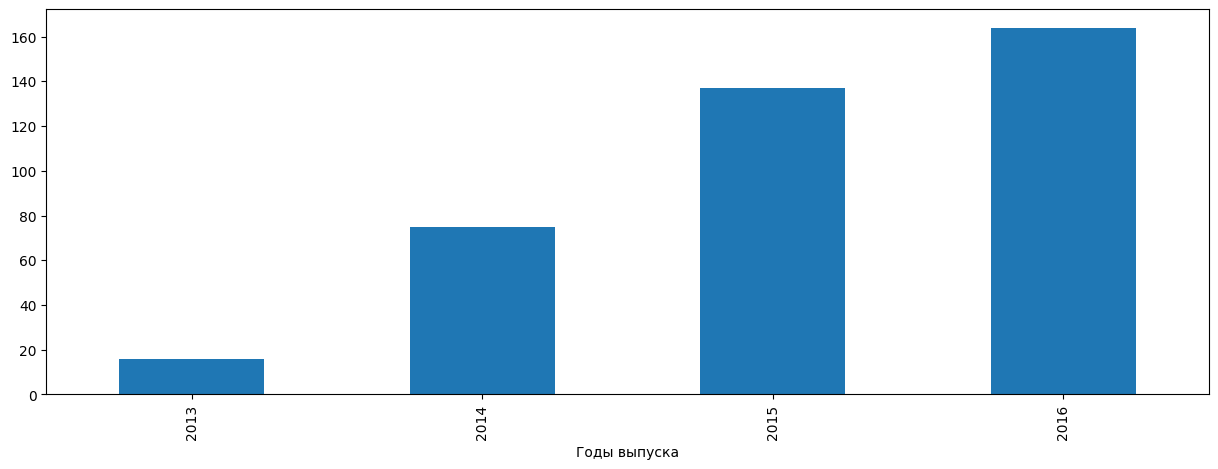

Количество выпускаемых игр по годам для PS3


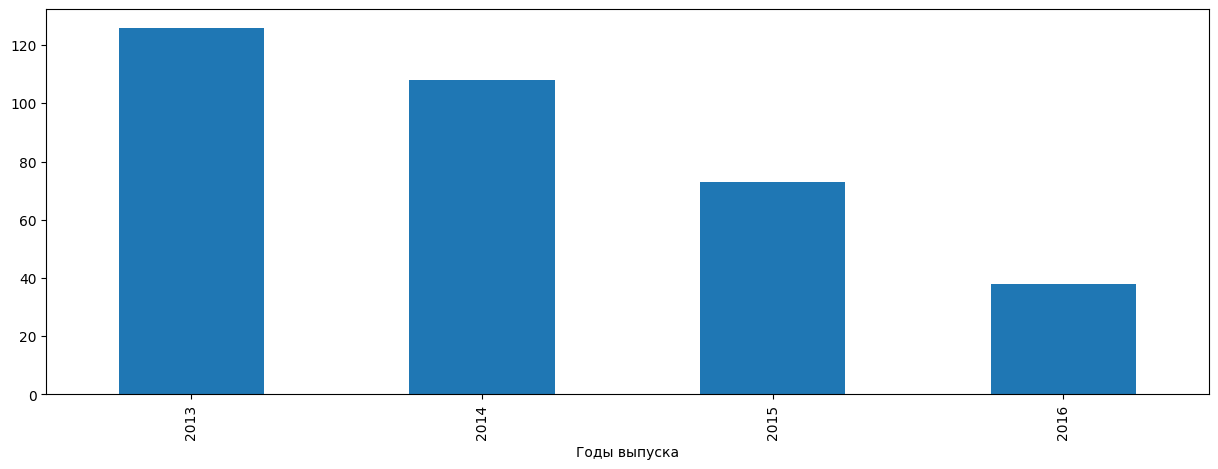

Количество выпускаемых игр по годам для XOne


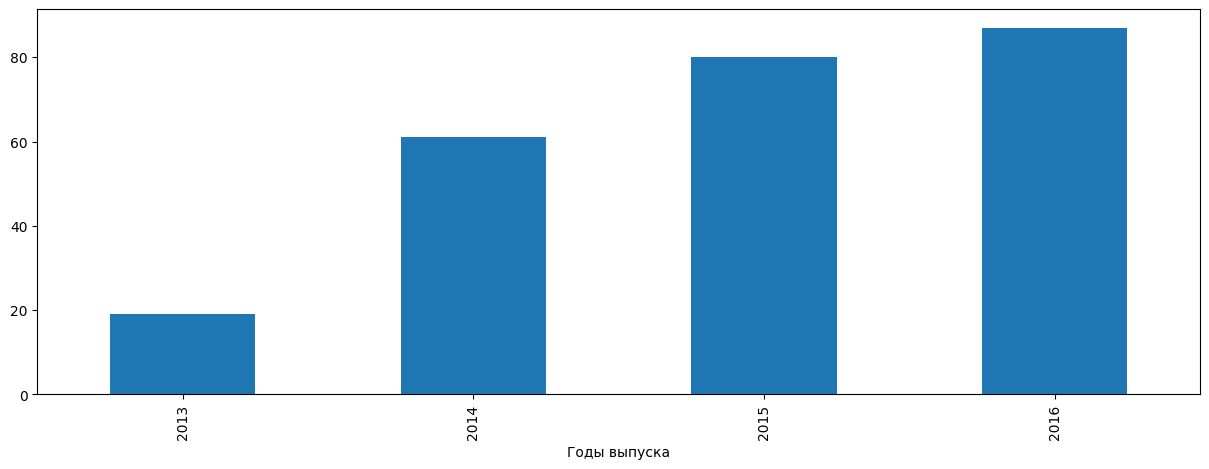

Количество выпускаемых игр по годам для 3DS


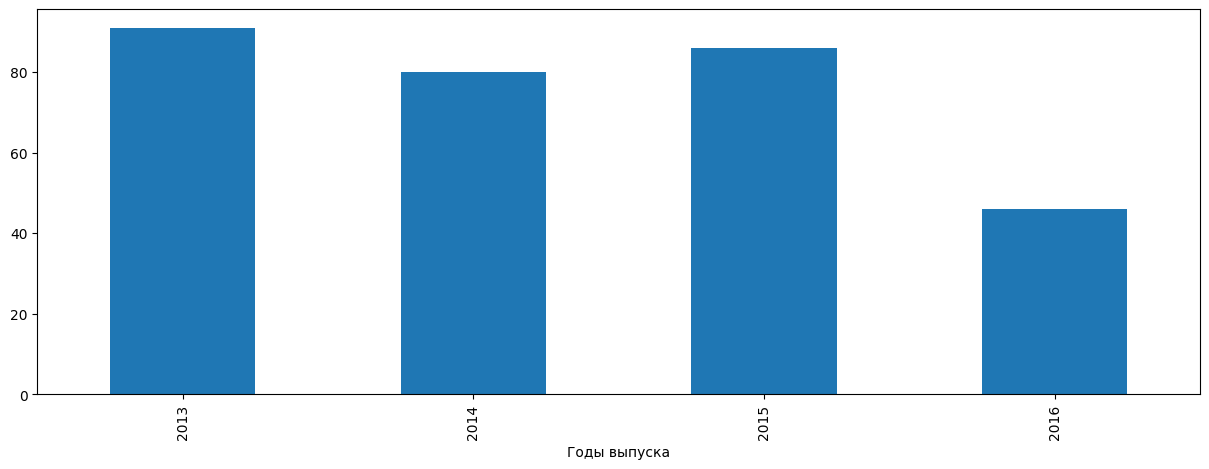

Количество выпускаемых игр по годам для X360


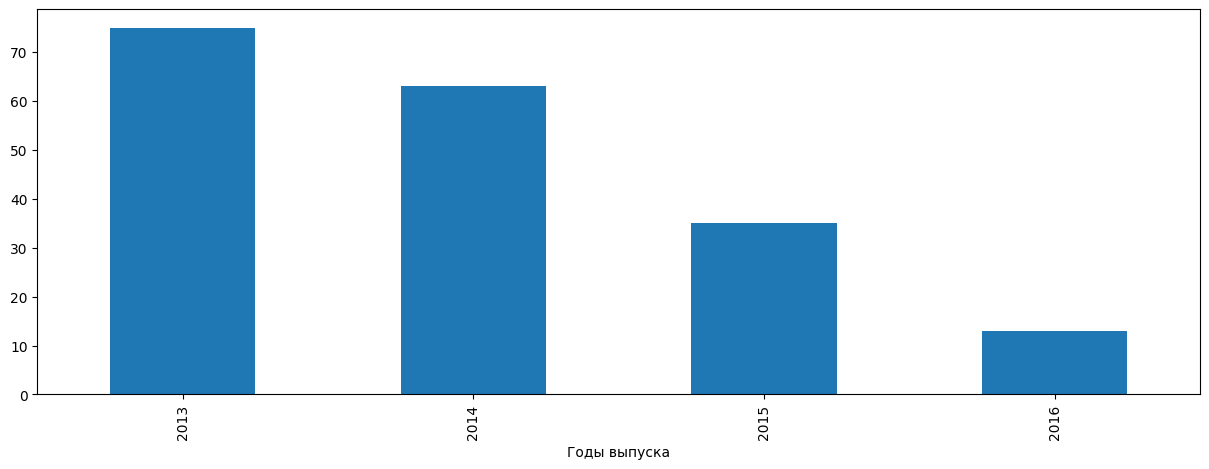

Количество выпускаемых игр по годам для WiiU


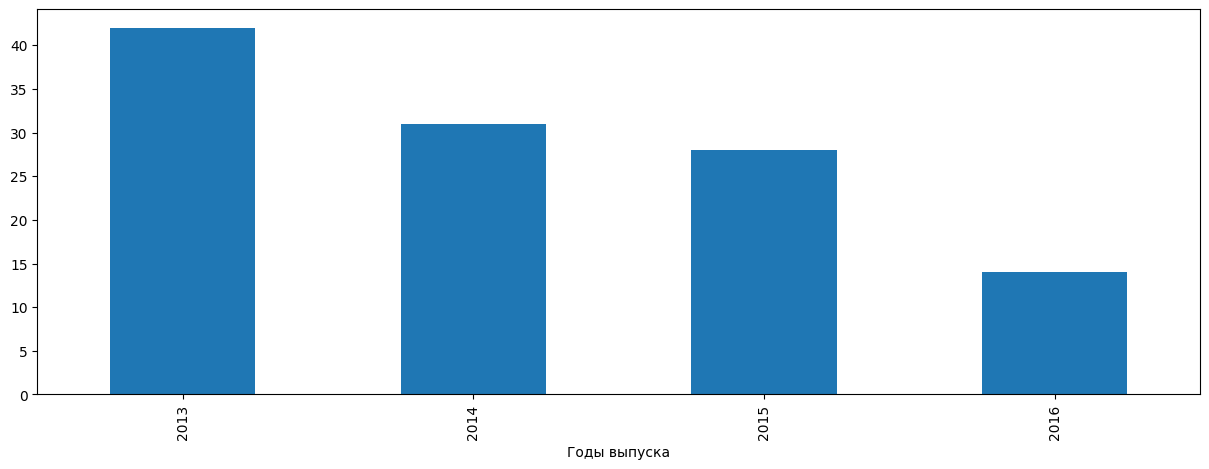

Количество выпускаемых игр по годам для PC


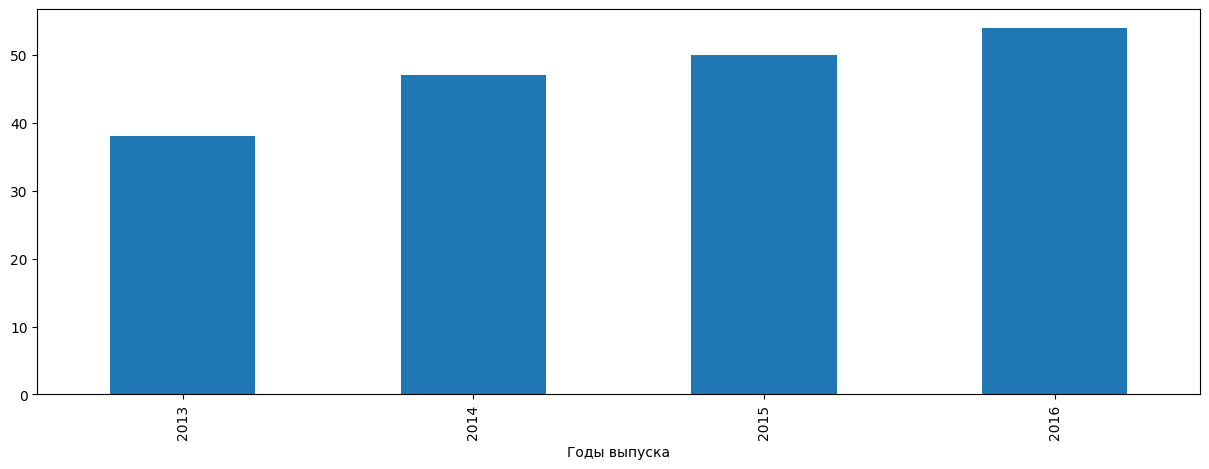

Количество выпускаемых игр по годам для PSV


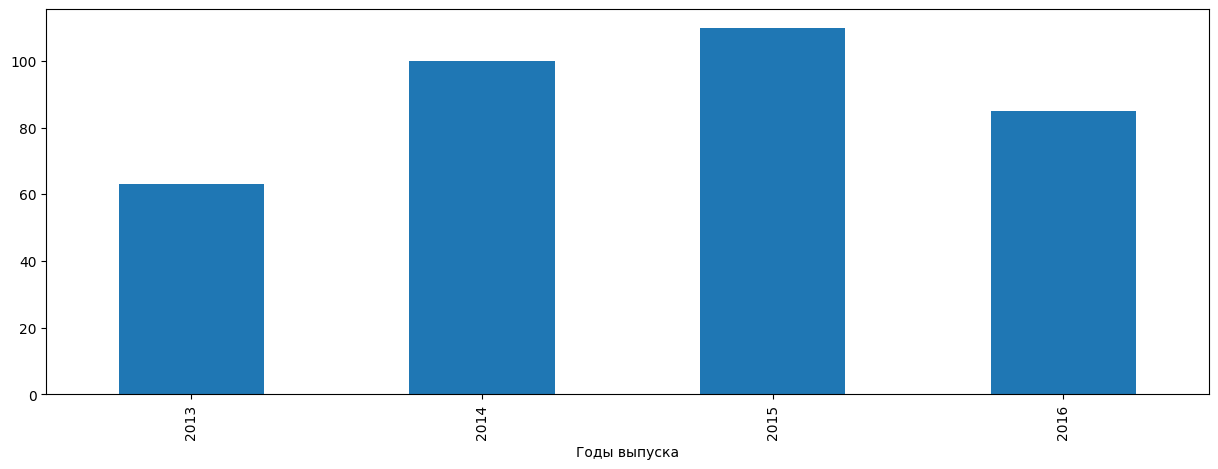

Количество выпускаемых игр по годам для Wii


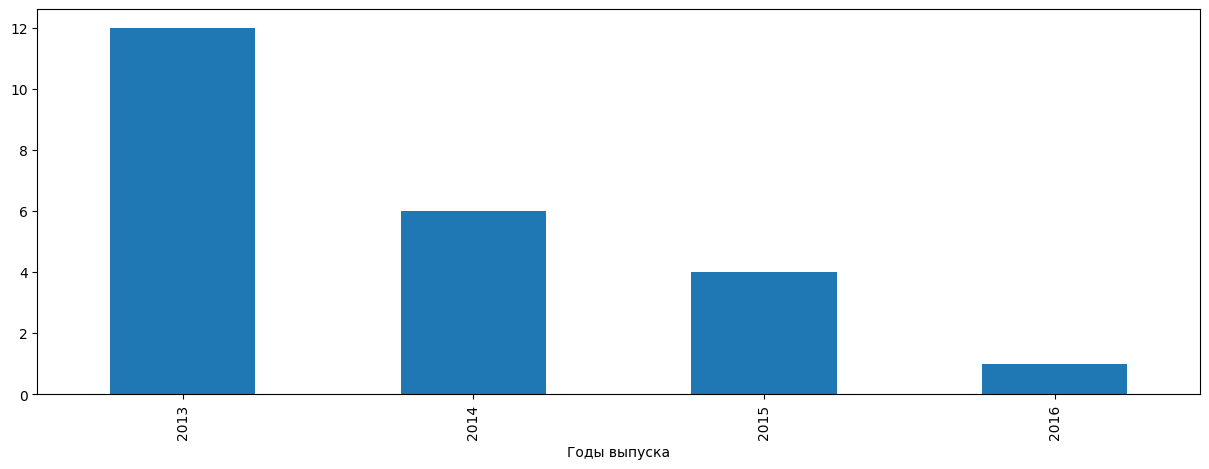

Количество выпускаемых игр по годам для PSP


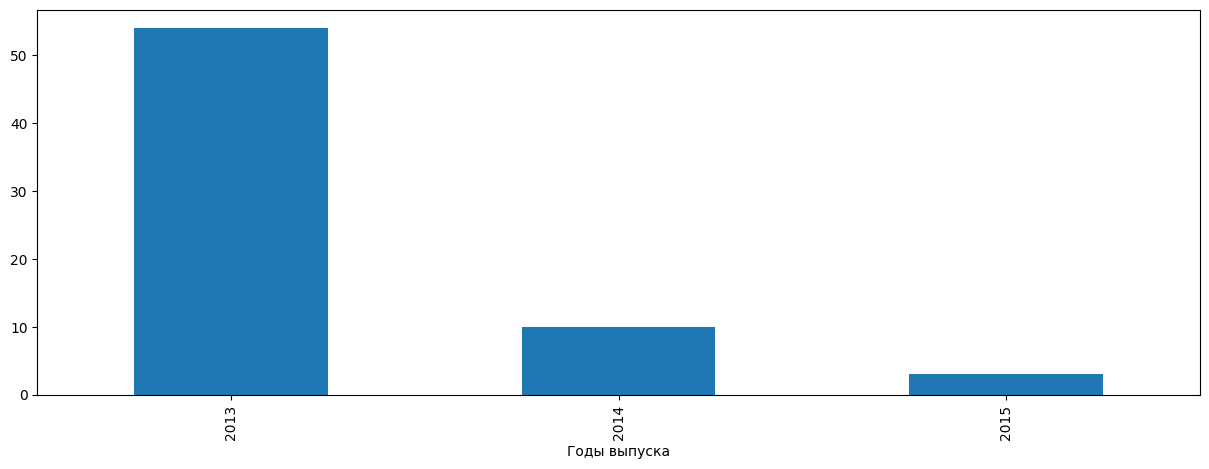

Количество выпускаемых игр по годам для DS


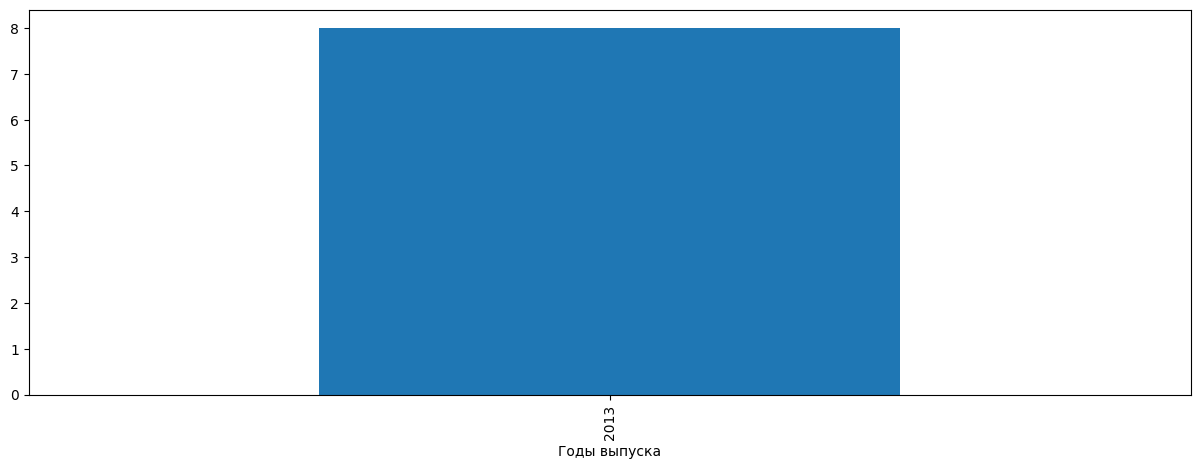

In [17]:
sales_by_platform = act_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index(level='platform')
sales_by_platform.columns = ['platform', 'total_sales']
best_15_platform = list(sales_by_platform.sort_values(by='total_sales', ascending=False)['platform'].head(15))
for platform in best_15_platform:
    games = act_data[act_data['platform'] == platform].groupby('year_of_release')['name'].count()
    print ('Количество выпускаемых игр по годам для', platform)
    games.plot(xlabel='Годы выпуска', kind='bar', figsize=(15,5))
    plt.show()

PS3, X360, 3DS, Wii,  WiiU - практически отжили свое и выпускают единицы игр.
PSP, DS - вообще перестали выпускать игры
А вот PS4, XOne только набирают обороты и находятся на вершине популярности.
PC и PSV - уверенно держаться на плаву.


### **Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.**

In [18]:
data_best_15 = act_data[act_data['platform'].isin(best_15_platform)]
data_best_15.info()
data_best_15['platform'].value_counts()
del data_best_15

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     2233 non-null   float64
 9   user_score       2233 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


(0.0, 2.0)

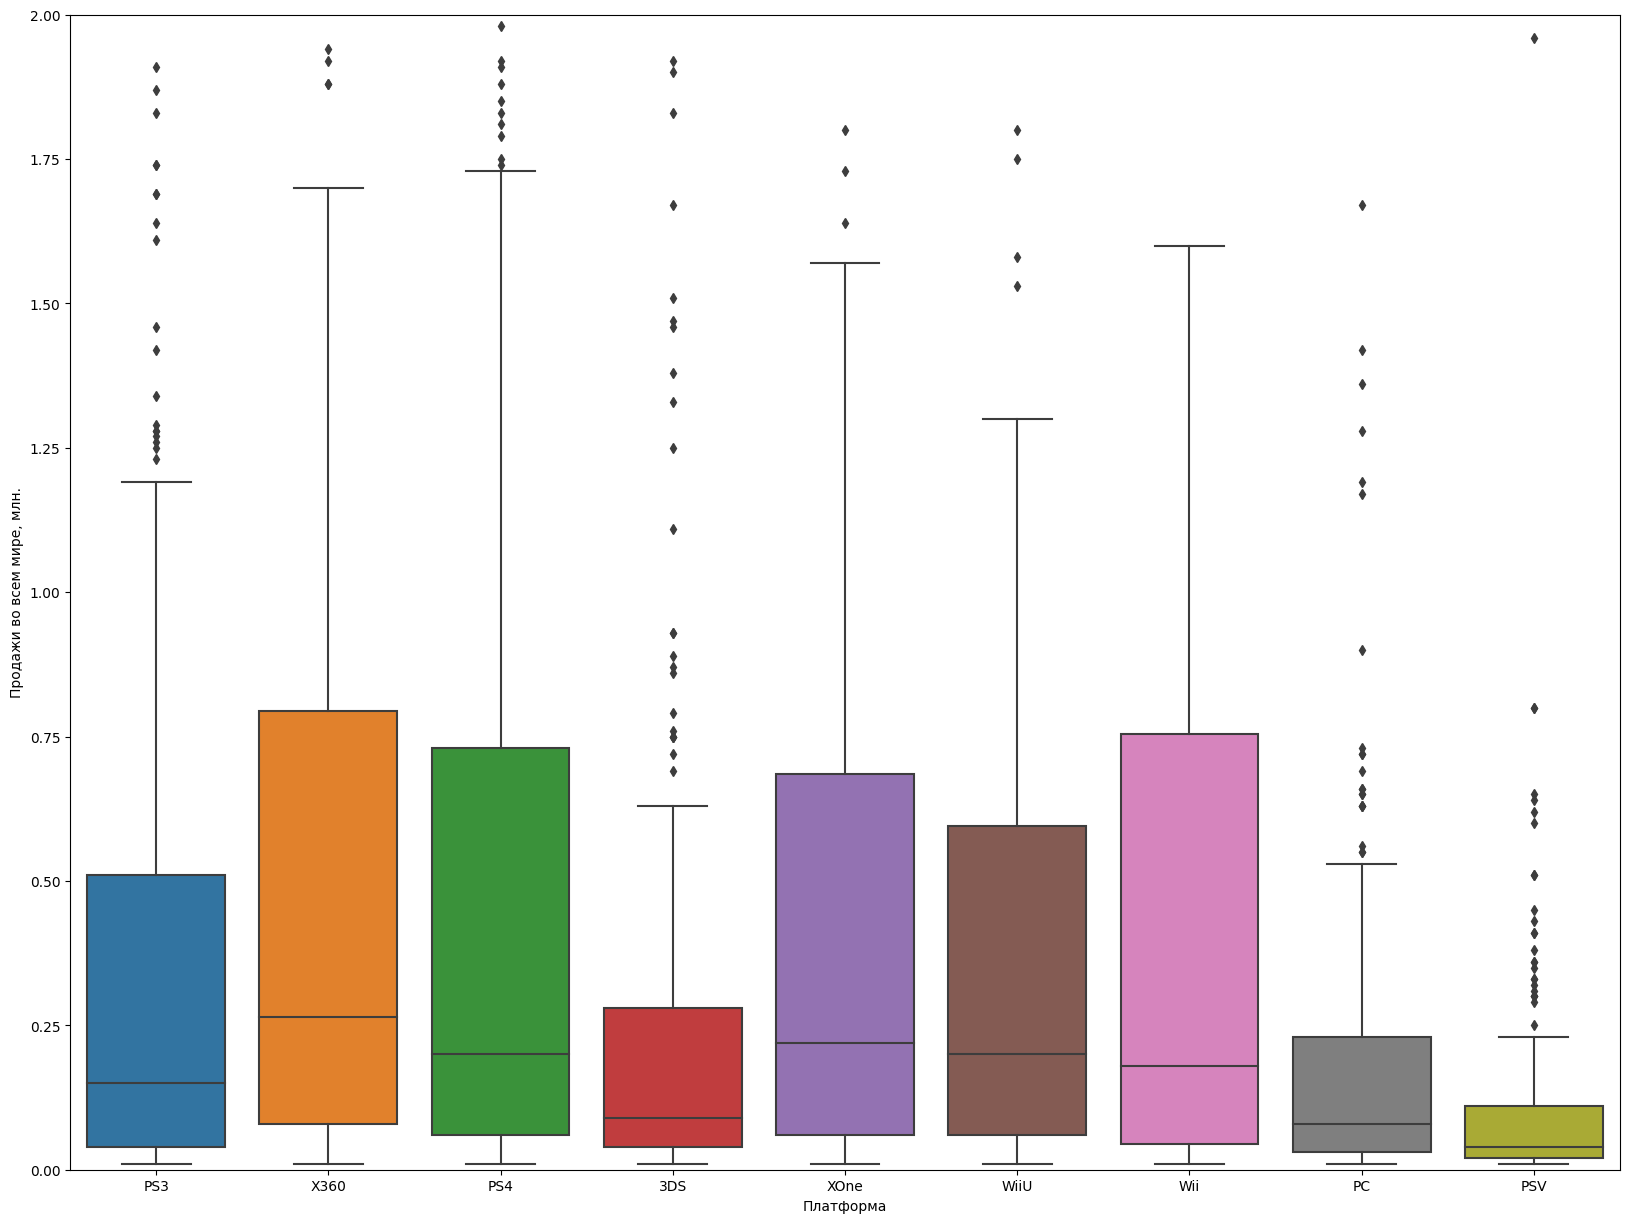

In [19]:
act_data = act_data[act_data['platform'] != 'PSP']
act_data = act_data[act_data['platform'] != 'DS']
plt.figure(figsize=(20, 15))
sns.boxplot(data=act_data, x='platform', y = 'total_sales')
plt.xlabel('Платформа')
plt.ylabel('Продажи во всем мире, млн.')
plt.ylim(0, 2)

In [20]:
act_data.query('total_sales > 5')['name'].unique()

array(['Grand Theft Auto V', 'Call of Duty: Black Ops 3',
       'Pokemon X/Pokemon Y', 'Pokemon Omega Ruby/Pokemon Alpha Sapphire',
       'Call of Duty: Ghosts', 'Minecraft', 'FIFA 16',
       'Star Wars Battlefront (2015)', 'Call of Duty: Advanced Warfare',
       'FIFA 17', 'Super Smash Bros. for Wii U and 3DS', 'Fallout 4',
       'Pokemon Sun/Moon', 'Mario Kart 8', 'FIFA 14', 'FIFA 15',
       'The Last of Us', 'Destiny', "Uncharted 4: A Thief's End",
       'Tomodachi Life'], dtype=object)

Смотря на диаграммы размаха - можно увидеть, что наибольшие медианы продаж у платформ X360, PS3, PS4, Wii, XOne, WiiU.

PSV - является мобильной консолью и не так распространена. Продажи для нее меньше.

3DS является уже устаревшей платформой и продажи на по ней идут хуже.

PC же не является чисто игровой платформой, поэтому продаж не нее меньше.

 Выбросы в данном случае - суперхиты, которые могут похвастаться милионными продажами, и о которых слышали даже люди, далекие от мира игр.

### **Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.**

**Соотнесите выводы с продажами игр на других платформах.**

Возьмем PS4, как одного из актуальных лидеров

In [21]:
act_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2158 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2158 non-null   object 
 1   platform         2158 non-null   object 
 2   year_of_release  2158 non-null   int64  
 3   genre            2158 non-null   object 
 4   na_sales         2158 non-null   float64
 5   eu_sales         2158 non-null   float64
 6   jp_sales         2158 non-null   float64
 7   other_sales      2158 non-null   float64
 8   critic_score     2158 non-null   float64
 9   user_score       2158 non-null   float64
 10  rating           2158 non-null   object 
 11  total_sales      2158 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 219.2+ KB


In [22]:
ps4_data = act_data.loc[(act_data['platform'] == 'PS4')\
                        & (act_data['user_score'] > 0)
                        & (act_data['critic_score'] > 0) \
                        & (act_data['total_sales'] < 5)].copy()


Коэффициент корреляции продажами и оценками критиков составляет: 0.4


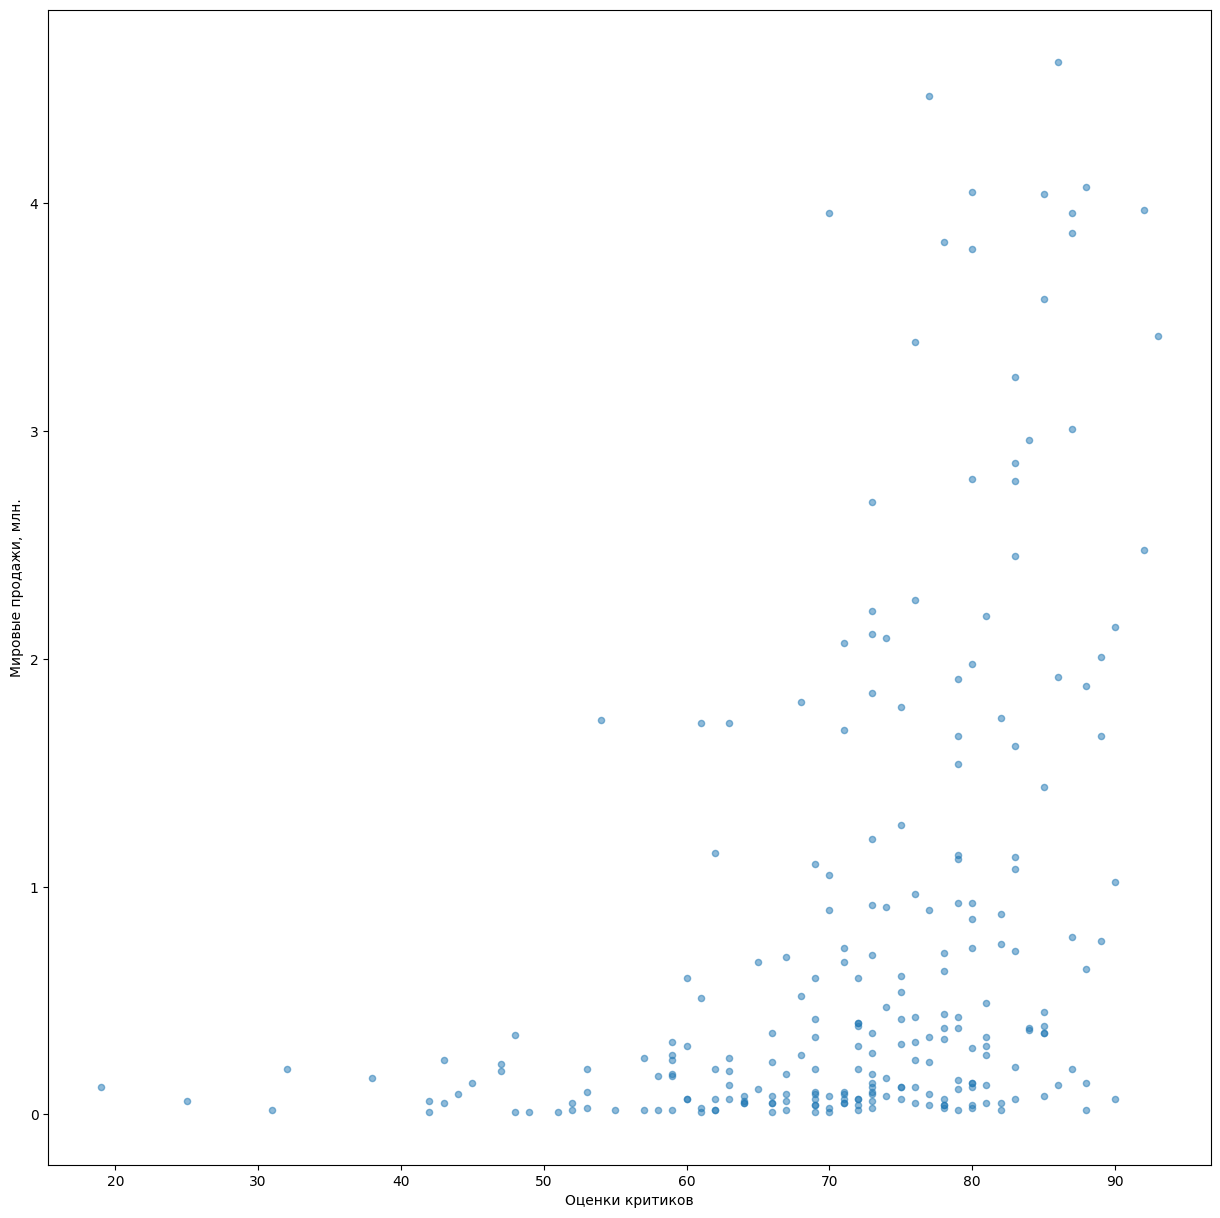

In [23]:
ps4_data.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(15,15))
plt.ylabel('Мировые продажи, млн.')
plt.xlabel('Оценки критиков')
print('Коэффициент корреляции продажами и оценками критиков составляет:', \
      ps4_data['critic_score'].\
      corr(ps4_data['total_sales']).round(2))

Как ни странно, но оценки критиков очень мало связаны с продажами игр в мире. Проверим-ка оценки пользователей

Коэффициент корреляции продажами и оценками пользователей составляет: 0.01


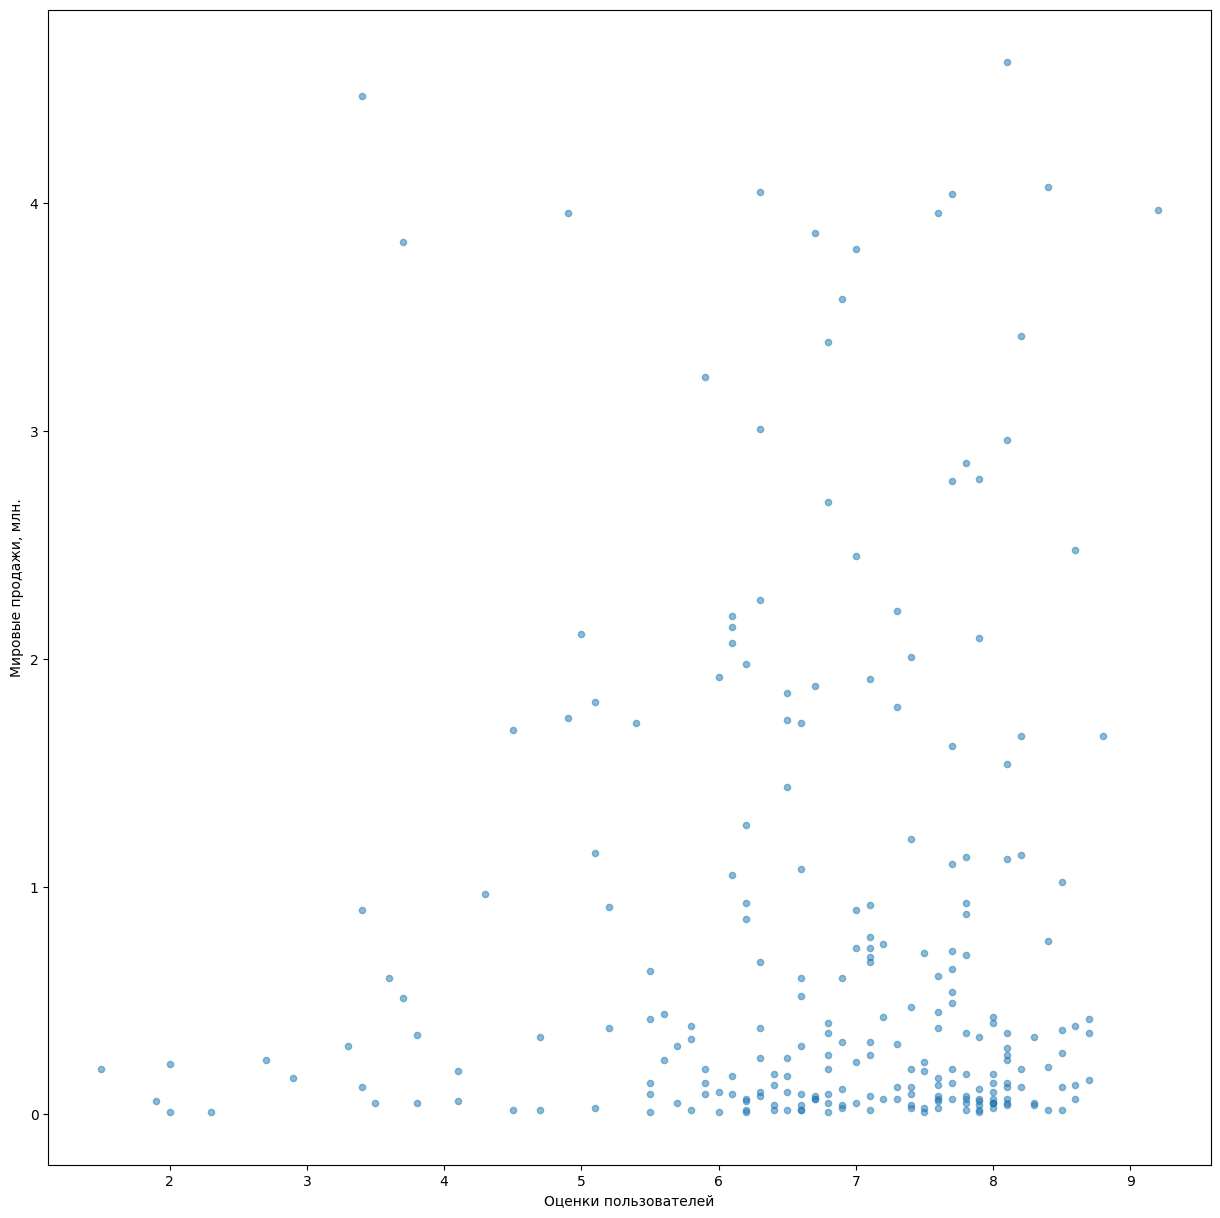

In [24]:
ps4_data.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(15,15))
plt.ylabel('Мировые продажи, млн.')
plt.xlabel('Оценки пользователей')
print('Коэффициент корреляции продажами и оценками пользователей составляет:', \
      ps4_data['user_score'].corr(ps4_data['total_sales']).round(2))

Проверим-ка какую-нибудь мобильную платформу. Например PSV.

Коэффициент корреляции продажами и оценками критиков составляет: 0.25
Коэффициент корреляции продажами и оценками пользователей составляет: 0.27


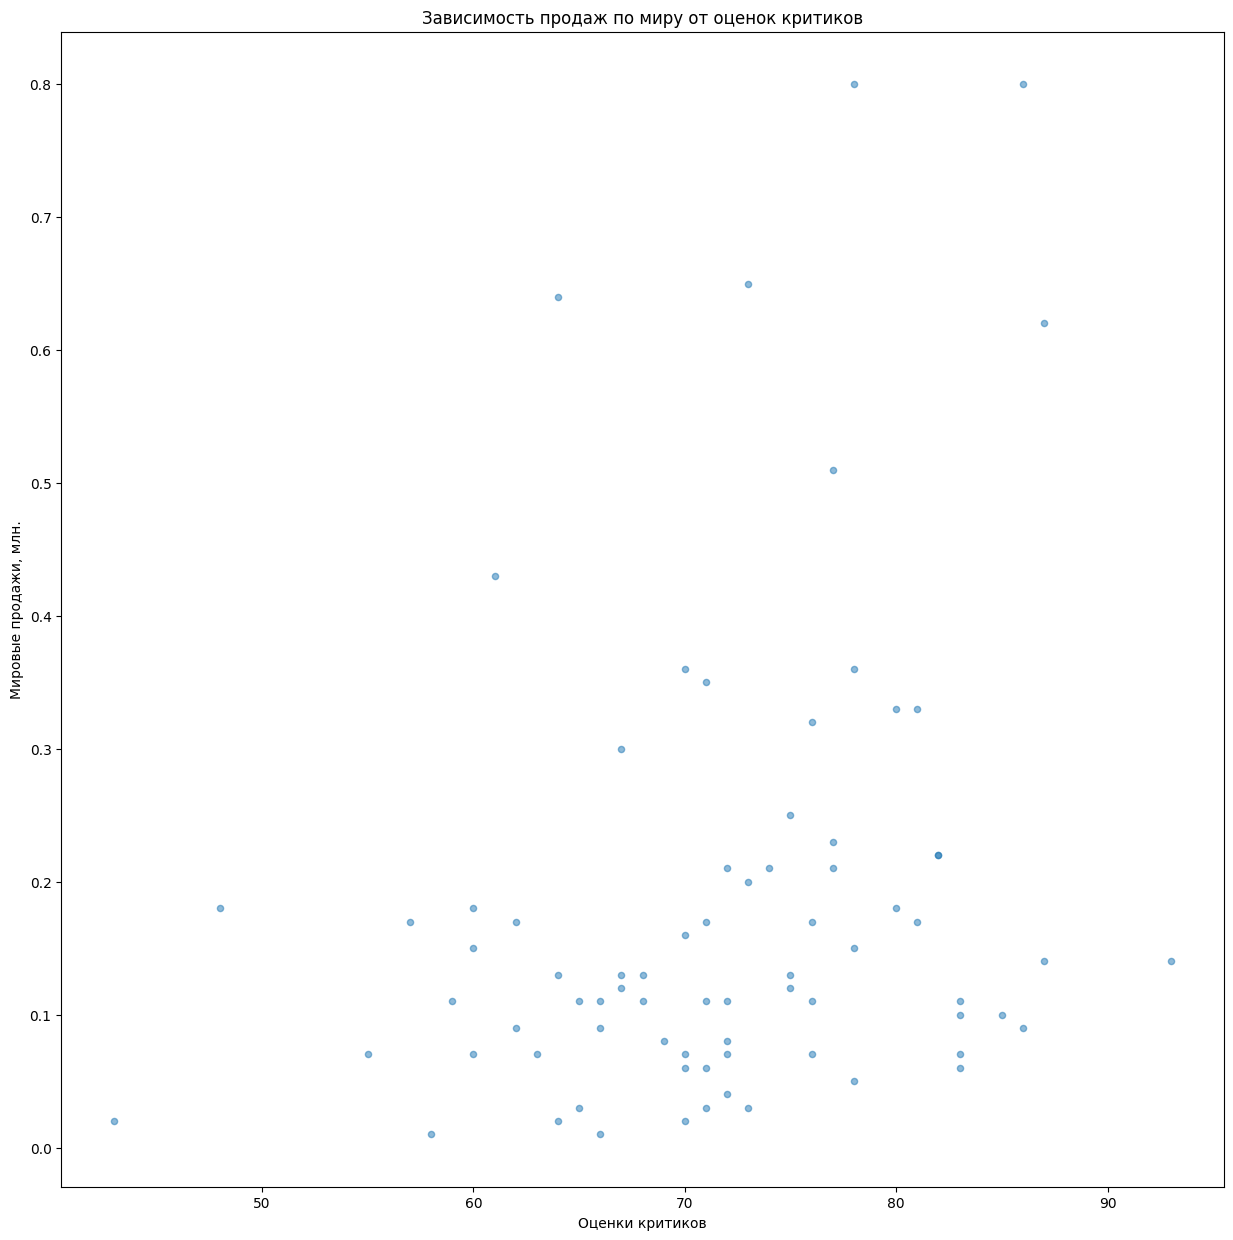

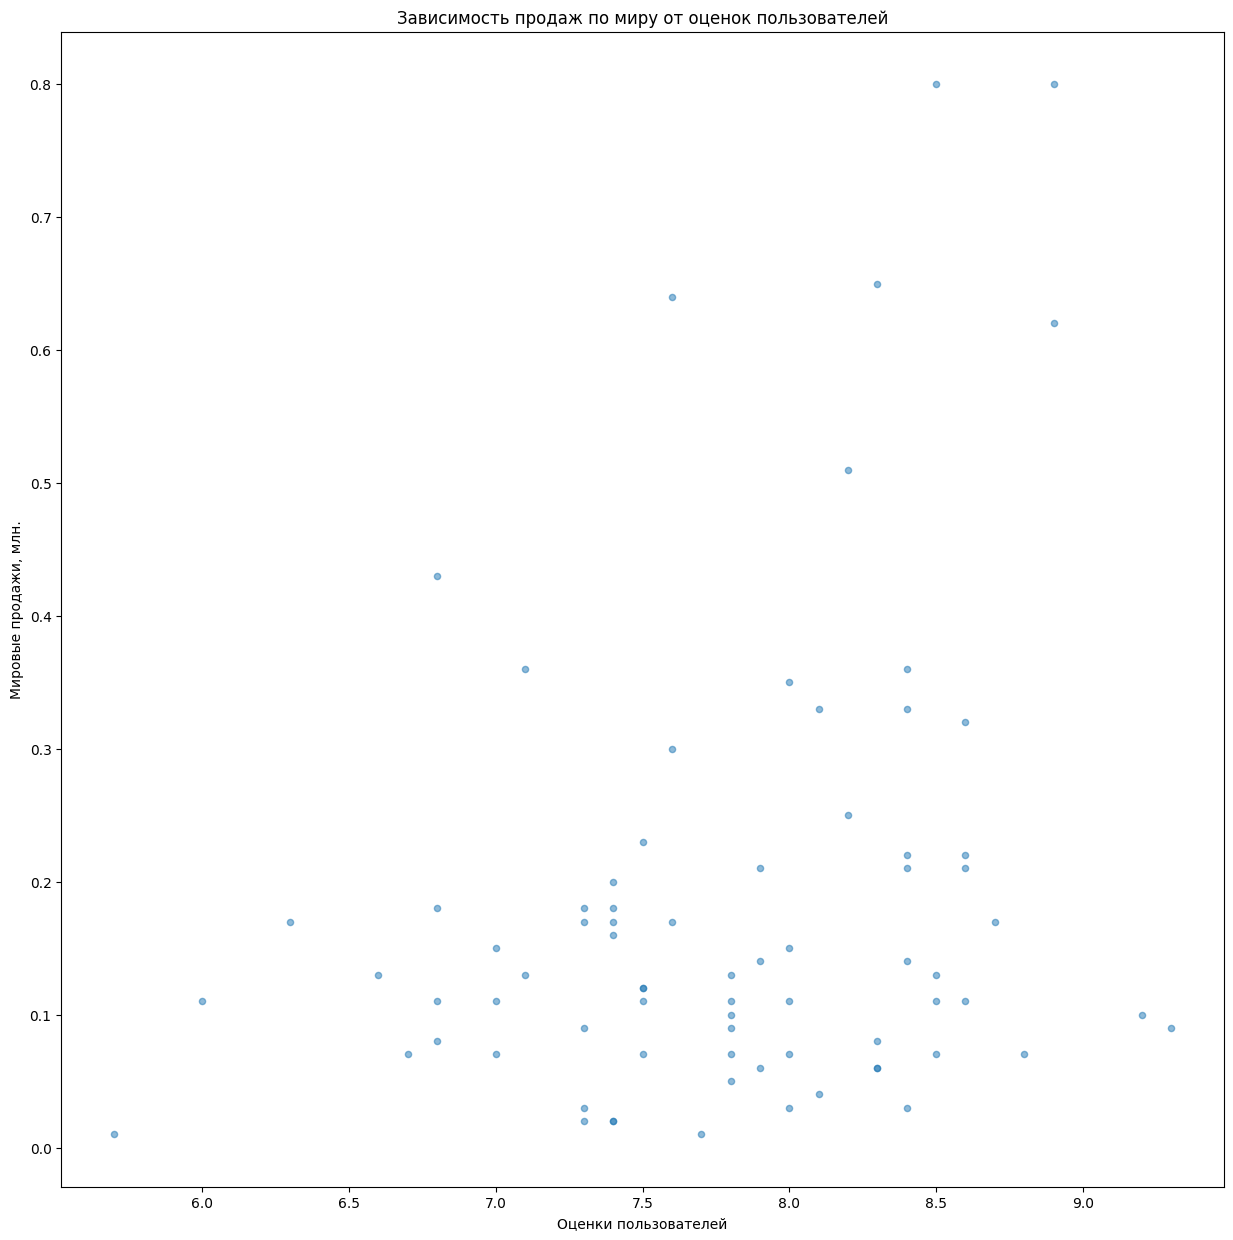

In [25]:
psv_data = act_data.loc[(act_data['platform'] == 'PSV')\
                        & (act_data['user_score'] > 0)
                        & (act_data['critic_score'] > 0) \
                        & (act_data['total_sales'] < 5)].copy()
print('Коэффициент корреляции продажами и оценками критиков составляет:', \
      psv_data['critic_score'].corr(psv_data['total_sales']).round(2))
print('Коэффициент корреляции продажами и оценками пользователей составляет:', \
      psv_data['user_score'].corr(psv_data['total_sales']).round(2))
psv_data.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(15,15))
plt.title('Зависимость продаж по миру от оценок критиков')
plt.ylabel('Мировые продажи, млн.')
plt.xlabel('Оценки критиков')
plt.show()
psv_data.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(15,15))
plt.title('Зависимость продаж по миру от оценок пользователей')
plt.ylabel('Мировые продажи, млн.')
plt.xlabel('Оценки пользователей')
plt.show()

Как видим, взаимосвязь оценок пользователей и продаж также невелика. Вероятно, это объясняется рекламными кампаниями, скидками и распродажами. На мобильных платформах коэффицент корреляциии повыше, но все равно менее 0,5.
Таким образом получается, что оценки критиков и зрителей мало влияют на продажи.

На мобильной платформе оценки пользователей больше связаны с продажами по миру, но оценки пользователей связаны меньше чем на PS4


### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Text(0, 0.5, 'Продажи по миру, млн')

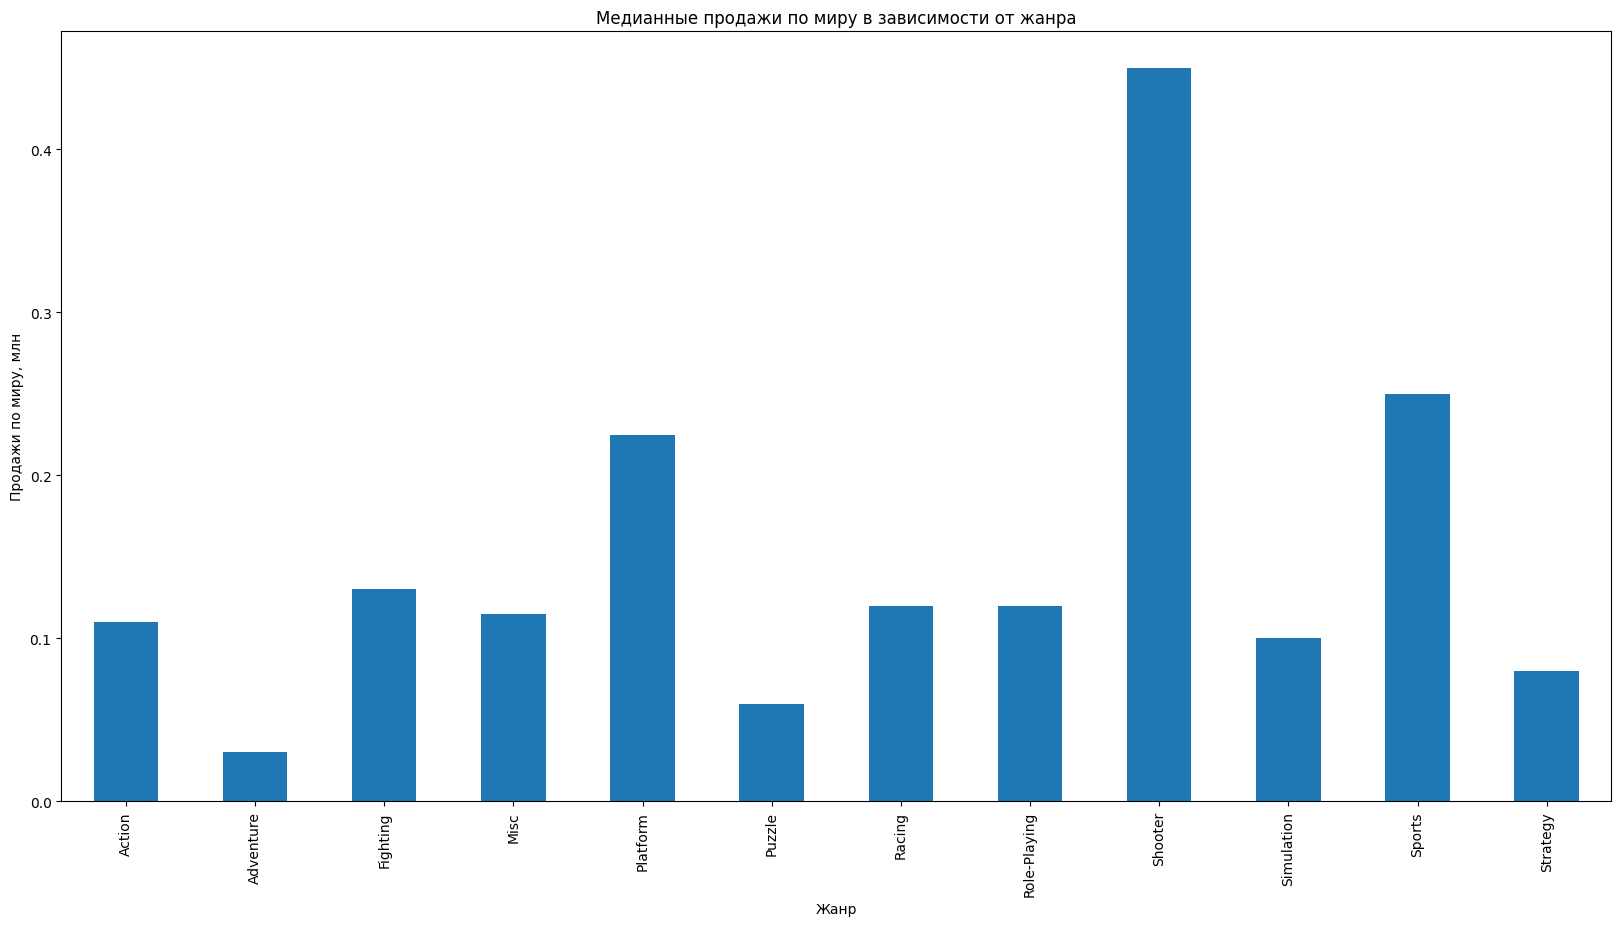

In [26]:
act_data.groupby('genre')['total_sales'].median().plot(kind='bar',figsize=(20, 10))
plt.title ('Медианные продажи по миру в зависимости от жанра')
plt.xlabel('Жанр')
plt.ylabel('Продажи по миру, млн')

При рассмотрении по жанрам резко выделяются игры жанра Shooter, Sports, Platform.
Вероятнее всего это объясняется тем, что данные жанры наиболее легкие для обучения им(в отличие, скажем от симуляторов и стратегий), а также тем, что они предлагают большую мультиплеерную составляющую.
Наиболее низкими продажами обладают игры жанров Puzzle, Advenure(эти жанры наиболее присущи мобильным платформам), а также Strategy и Simulation(данные жанры обладают более высоким "порогом вхождения").
Остальным жанрам присущи примерно одинаковые медианные уровни продаж.

## Шаг 4. Составьте портрет пользователя каждого региона

### **Определите для пользователя каждого региона (NA, EU, JP):**
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

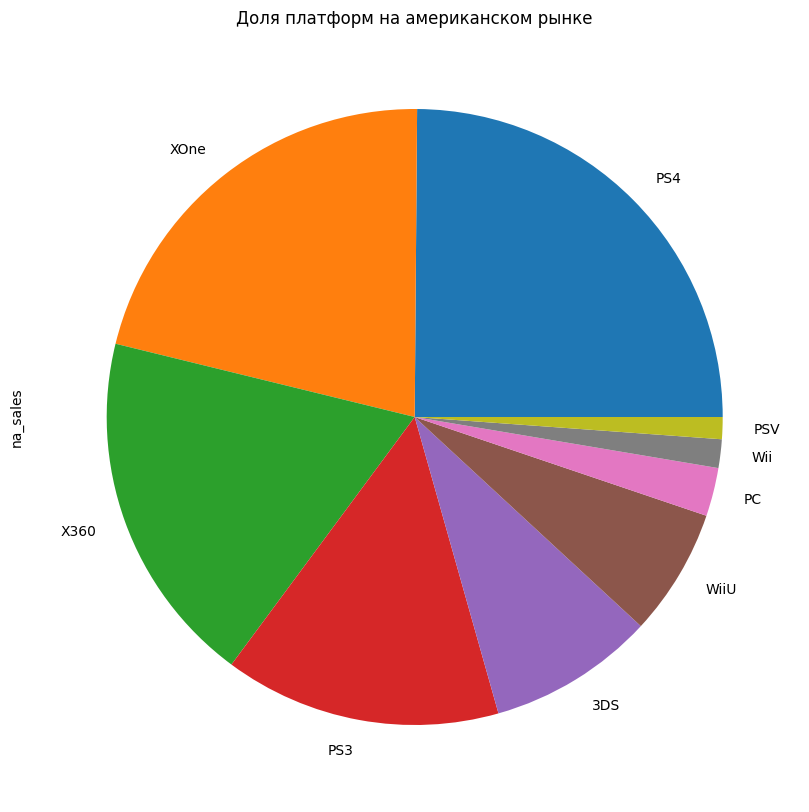

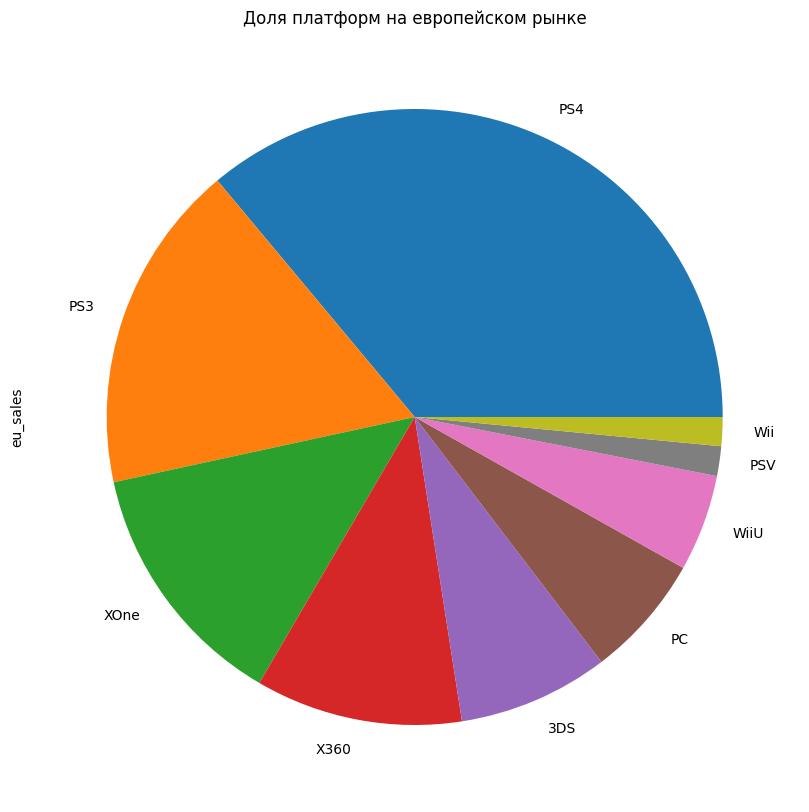

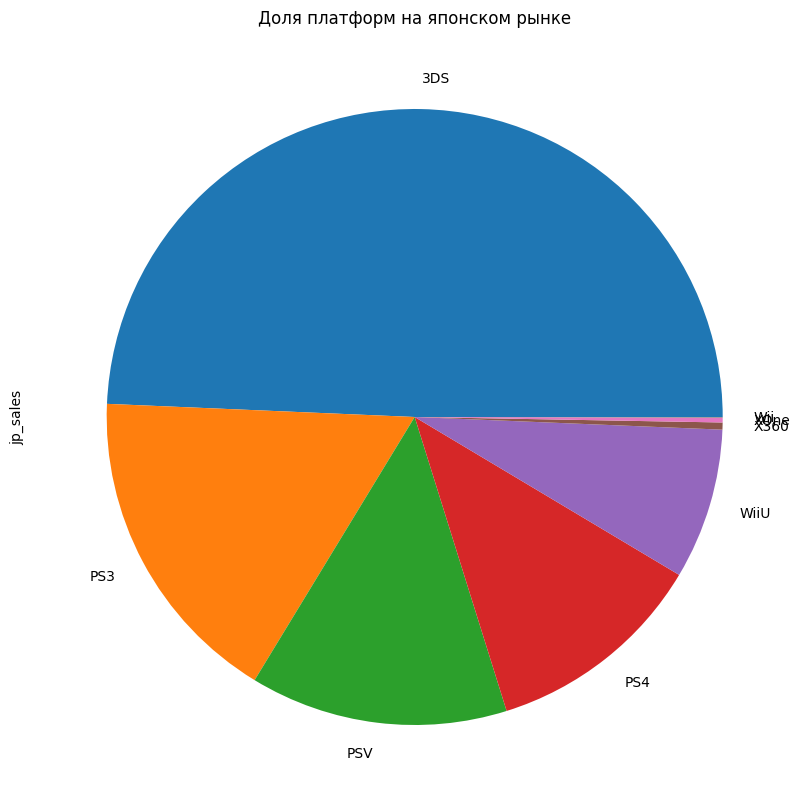

In [35]:
for row in act_data[['na_sales', 'eu_sales', 'jp_sales']]:
    act_data.groupby('platform')[row].sum().sort_values(ascending=False).plot(kind='pie',figsize=(10, 10))
    if row == 'na_sales':
        plt.title('Доля платформ на американском рынке')
    elif row == 'eu_sales':
        plt.title('Доля платформ на европейском рынке')
    else:
        plt.title('Доля платформ на японском рынке')
    plt.show()

In [36]:
for row in act_data[['na_sales', 'eu_sales', 'jp_sales']]:
    platform = act_data.groupby('platform')[row].sum().sort_values(ascending=False).reset_index()
    platform['share'] = (platform[row] / platform[row].sum() * 100).round(2)
    display (platform.head(5))

,platform,na_sales,share
0,PS4,108.74,24.88
1,XOne,93.12,21.30
2,X360,81.66,18.68
3,PS3,63.50,14.53
4,3DS,38.20,8.74


,platform,eu_sales,share
0,PS4,141.09,36.07
1,PS3,67.81,17.33
2,XOne,51.59,13.19
3,X360,42.52,10.87
4,3DS,30.96,7.91


,platform,jp_sales,share
0,3DS,67.81,49.32
1,PS3,23.35,16.98
2,PSV,18.59,13.52
3,PS4,15.96,11.61
4,WiiU,10.88,7.91


На американском рынке ТОП-5 платформ выглядит как  PS4, XOne, X360, PS3, 3DS.

В Европе ТОП-5 платформ выглядит как   PS4, PS3, Xone, X360, 3DS.

А вот в Японии приставки новых поколений почти не представлены в ТОП-5. Есть  толька PS4 на 4 месте. Пятерка лидеров выглядит следующим образом: 3DS, PS3, PSV, PS4, WiiU. Почти половину рынка занимает мобильная 3DS, что явно отличает Японию от других рынков

### Самые популярные жанры (топ-5). Поясните разницу.

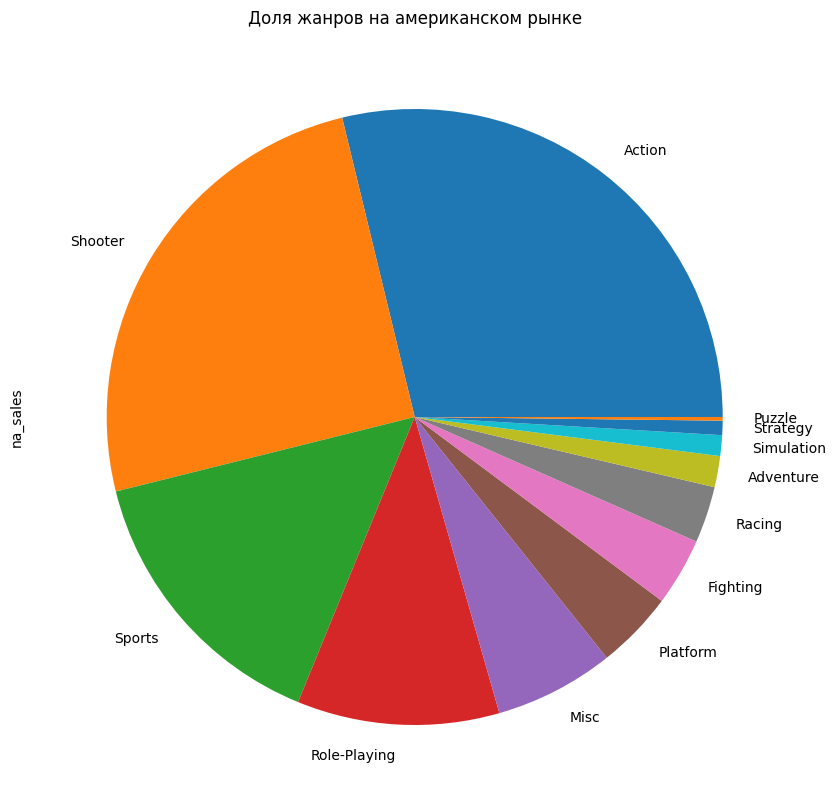

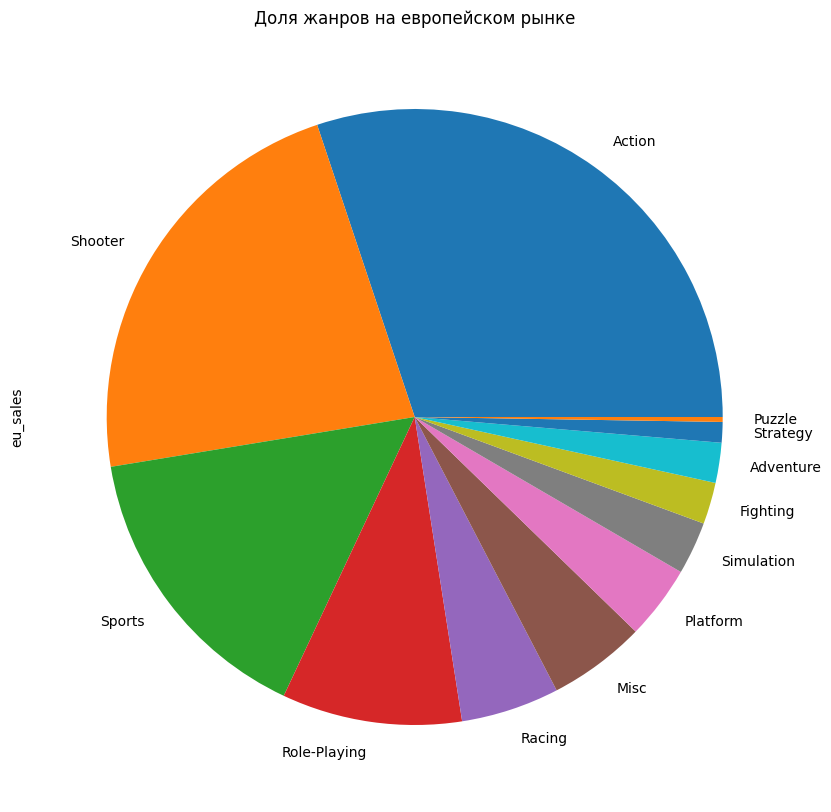

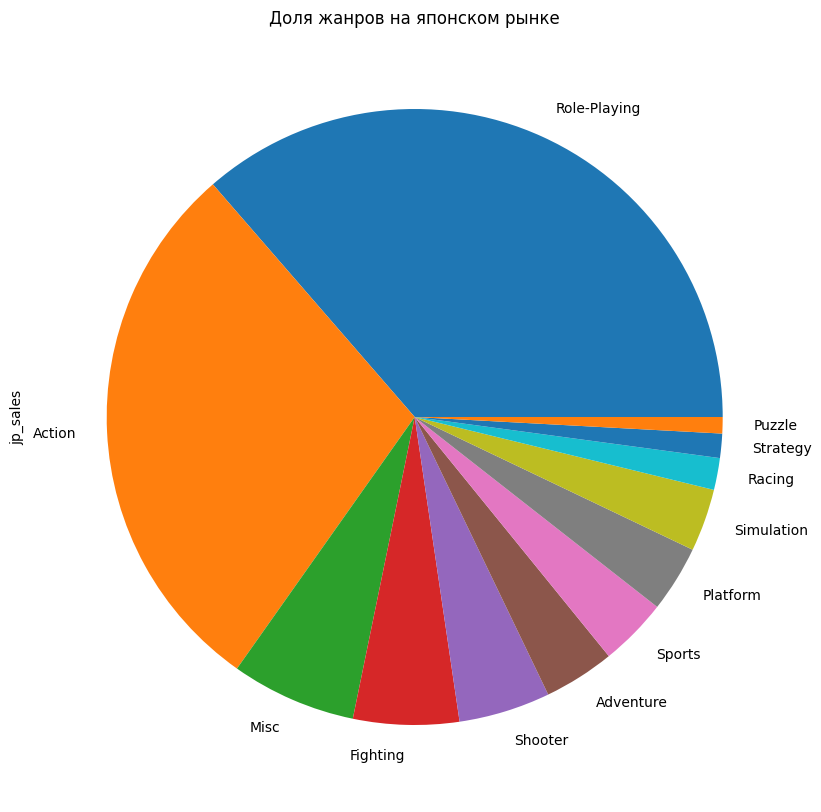

In [29]:
for row in act_data[['na_sales', 'eu_sales', 'jp_sales']]:
    act_data.groupby('genre')[row].sum().sort_values(ascending=False).plot(kind='pie',figsize=(10, 10))
    if row == 'na_sales':
        plt.title('Доля жанров на американском рынке')
    elif row == 'eu_sales':
        plt.title('Доля жанров на европейском рынке')
    else:
        plt.title('Доля жанров на японском рынке')
    plt.show()

In [30]:
for row in act_data[['na_sales', 'eu_sales', 'jp_sales']]:
    genre = act_data.groupby('genre')[row].sum().sort_values(ascending=False).reset_index()
    genre['share'] = (genre[row] / genre[row].sum() * 100).round(2)
    display (genre.head(5))

,genre,na_sales,share
0,Action,125.83,28.78
1,Shooter,109.74,25.10
2,Sports,65.27,14.93
3,Role-Playing,46.40,10.61
4,Misc,27.46,6.28


,genre,eu_sales,share
0,Action,117.87,30.13
1,Shooter,87.86,22.46
2,Sports,60.34,15.42
3,Role-Playing,36.97,9.45
4,Racing,20.19,5.16


,genre,jp_sales,share
0,Role-Playing,50.01,36.37
1,Action,39.65,28.84
2,Misc,9.03,6.57
3,Fighting,7.63,5.55
4,Shooter,6.61,4.81


Как видим по результатам - в Америке и Европе ТОП-5 по жанрам практически одинаков. Почти половину рынка занимают 2 жанра - Action и Shooter. Псоле этого идут Sports и Role_Playing с небольшой разницей.

В Европе гоночные игры любят больше и этот жанр выкарабкался на 5 место, в отличе от Америки, где предпочитают жанр Misc.

А вот японский рынок отличается кардинально. Больше трети рынка захватил жанр RPG, на втором месте Action. Далеко позаади плетуться Misc, Fighting и Adventure. Последние два жанра характерны для мобильных платформ, а их , как мы выяснили в Японии используют гораздо больше.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

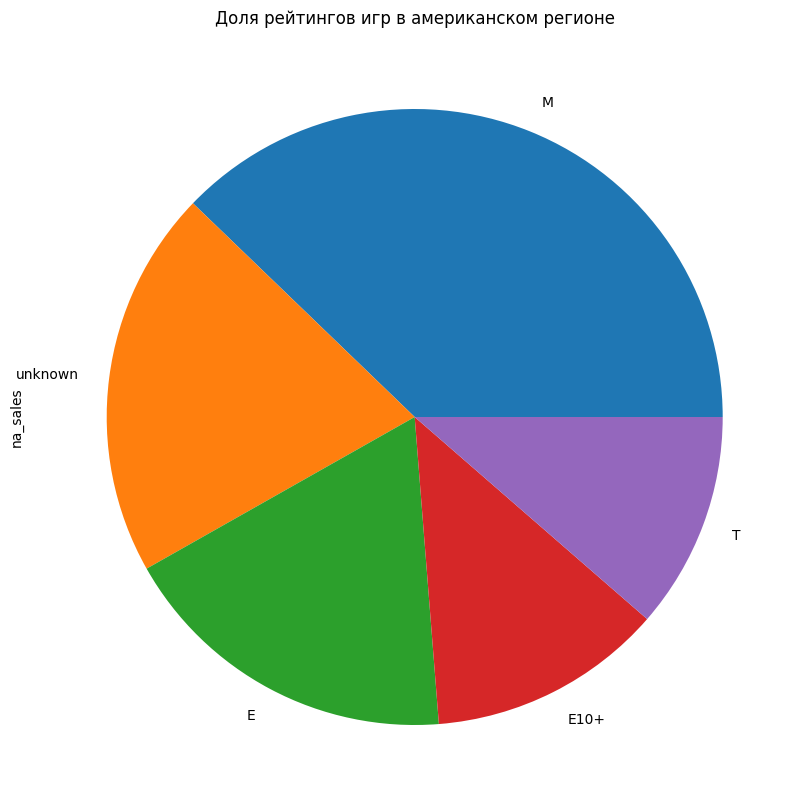

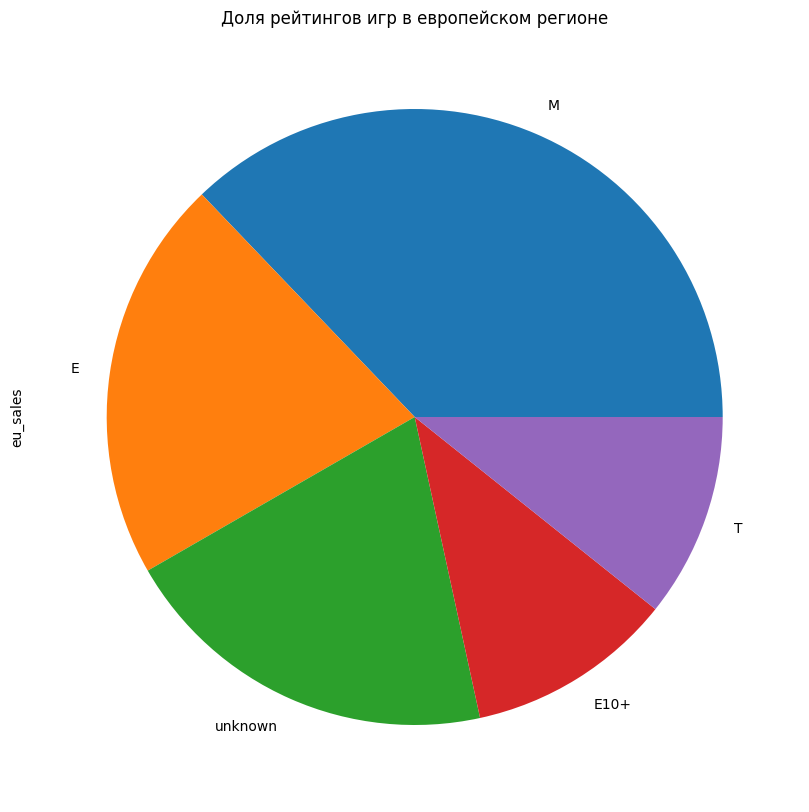

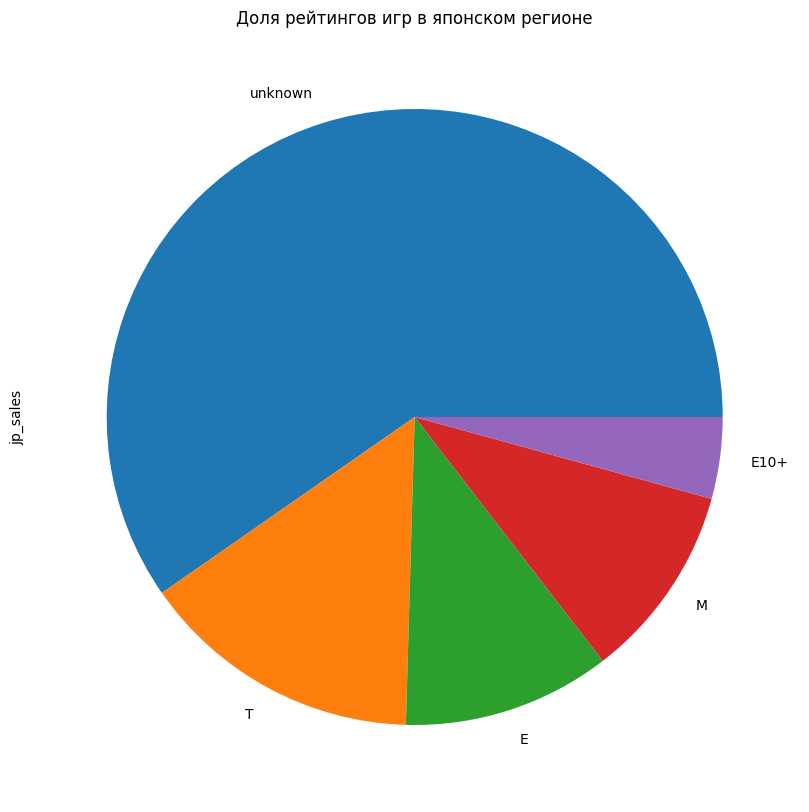

In [31]:
for row in act_data[['na_sales', 'eu_sales', 'jp_sales']]:
    act_data.groupby('rating')[row].sum().sort_values(ascending=False).plot(kind='pie', figsize=(20,10))
    if row == 'na_sales':
        plt.title('Доля рейтингов игр в американском регионе')
    elif row == 'eu_sales':
        plt.title('Доля рейтингов игр в европейском регионе')
    else:
        plt.title('Доля рейтингов игр в японском регионе')
    plt.show()

В Америке и Европе больше половины рынкка занимают игры со взрослым рейтингом M и игры "для всех" Е. В Европе несколько большая доля игр  с неизвестынм рейтингом, что объясняется тем, что ESRB - это американская система оценок рейтингов игр. В Европе используется PEGI, но данных по этим рейтингам у нас нет.

В Японии вообще большая часть игр очевидно принадлежит местному рынку и не проходит оценивание ESRB.
Таким образом можно сделать вывод, что во всех регионах рейтинги ESRB мало влияют на продажи.

## Шаг 5. Проверьте гипотезы

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

За нулевую гипотезу возьмем следующее: - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые..0

Альтернативная гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC отличаются друг от друга.

Типичное значение альфа составляет 0,05. Это утверждение подразумевает, что достоверность результатов теста составляет 95%.

In [32]:
xone_user_score = list(act_data[act_data['platform'] == 'XOne']['user_score'])
pc_user_score = list(act_data[act_data['platform'] == 'PC']['user_score'])
results = st.ttest_ind (xone_user_score, pc_user_score, equal_var=False)
alpha = 0.05
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.19564149183065668
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу не получилось отвергнуть.

**Вывод: Средние оценки пользователей Xbox One и PC одинаковы.**

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

За нулевую гипотезу возьмем следующее: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Типичное значение альфа составляет 0,05. Это утверждение подразумевает, что достоверность результатов теста составляет 95%.

In [33]:
action_user_score = list(act_data[act_data['genre'] == 'Action']['user_score'])
sports_user_score = list(act_data[act_data['genre'] == 'Sports']['user_score'])
results = st.ttest_ind (action_user_score, sports_user_score, equal_var=False)
alpha = 0.05
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.005072870817211842
Отвергаем нулевую гипотезу


Нулевая гипотеза звучала как "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые".
Эта гипотеза опроверглась - **рейтинги пользователей Action и Sports - разные.**

В задании гипотеза звучала по другому, но ttest_ind используется для проверки равенства двух совокупностей, поэтому взяли противоположное утверждение.

### Общие выводы

В результате исследовательского анализа данны мы выяснили, что средний срок "жизни" платформы - 6-7 лет, после чего количество выпускаемых игр идет на убыль в связи с появлением новых платформ. Исключение составляет PC, т.к игры на PC - вторичный продукт. В 2013 году вышли новые платформы, поэтому ктуальным периодом для исследования мы взяли 4 года - 2013 - 2016 года.

На конец 2016 года PS3, X360, 3DS, Wii,  WiiU - практически отжили свое и выпускают единицы игр.
PSP, DS - вообще перестали выпускать игры
А вот PS4, XOne только набирают обороты и находятся на вершине популярности.
PC и PSV - уверенно держаться на плаву.

Мы выяснили, что можно увидеть, что наибольшие медианы продаж у платформ X360, PS3, PS4, Wii, XOne, WiiU.

PSV - является мобильной консолью и не так распространена. Продажи для нее меньше.

3DS является уже устаревшей платформой и продажи на по ней идут хуже.

PC же не является чисто игровой платформой, поэтому продаж не нее меньше.

Корреляция между продажами и оценками критиков проявилась не столь ярко выраженно, как ожидалось. Коэффициент корреляции составляет 0,4

Корреляция между оценками пользователей и продажами вообще оказалась очень низкой. Вероятно это объясняется тем, что пользователи вначале покупают игру, а потом уже ставят оценку - и она может оказаться любой

При рассмотрении по жанрам резко выделяются игры жанра Shooter, Sports, Platform.
Вероятнее всего это объясняется тем, что данные жанры наиболее легкие для обучения им(в отличие, скажем от симуляторов и стратегий), а также тем, что они предлагают большую мультиплеерную составляющую.

Наиболее низкими продажами обладают игры жанров Puzzle, Advenure(эти жанры наиболее присущи мобильным платформам), а также Strategy и Simulation(данные жанры обладают более высоким "порогом вхождения").
Остальным жанрам присущи примерно одинаковые медианные уровни продаж.

На американском рынке ТОП-5 платформ выглядит как  PS4, XOne, X360, PS3, 3DS.

В Европе ТОП-5 платформ выглядит как   PS4, PS3, Xone, X360, 3DS.

А вот в Японии приставки новых поколений почти не представлены в ТОП-5. Есть  толька PS4 на 4 месте. Пятерка лидеров выглядит следующим образом: 3DS, PS3, PSV, PS4, WiiU. Почти половину рынка занимает мобильная 3DS, что явно отличает Японию от других рынков

Как видим по результатам - в Америке и Европе ТОП-5 по жанрам практически одинаков. Почти половину рынка занимают 2 жанра - Action и Shooter. Псоле этого идут Sports и Role_Playing с небольшой разницей.

В Европе гоночные игры любят больше и этот жанр выкарабкался на 5 место, в отличе от Америки, где предпочитают жанр Misc.

А вот японский рынок отличается кардинально. Больше трети рынка захватил жанр RPG, на втором месте Action. Далеко позаади плетуться Misc, Fighting и Adventure. Последние два жанра характерны для мобильных платформ, а их , как мы выяснили в Японии используют гораздо больше.



**Проверяя гипотезы, мы выяснили следующее:**
* Средние оценки пользователей Xbox One и PC **одинаковые**.
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») также **разные**